<IPython.core.display.Javascript object>


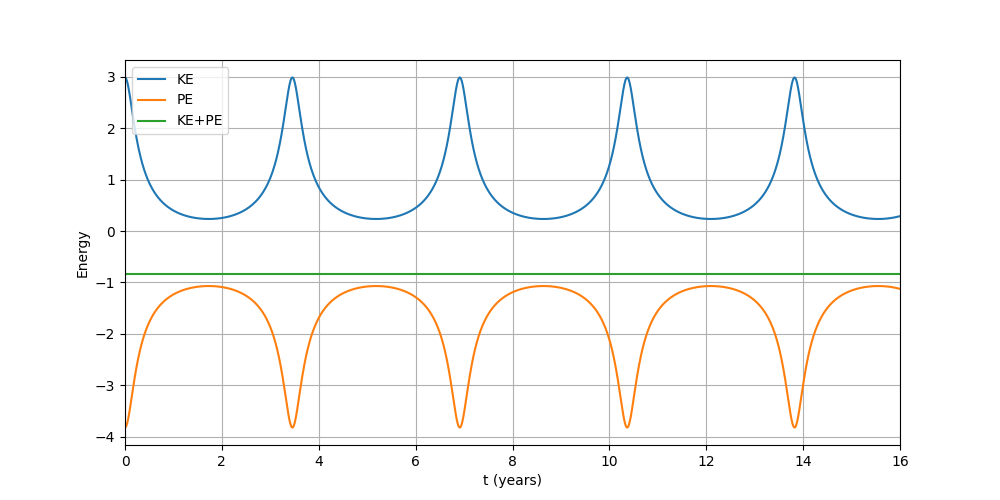

<IPython.core.display.Javascript object>


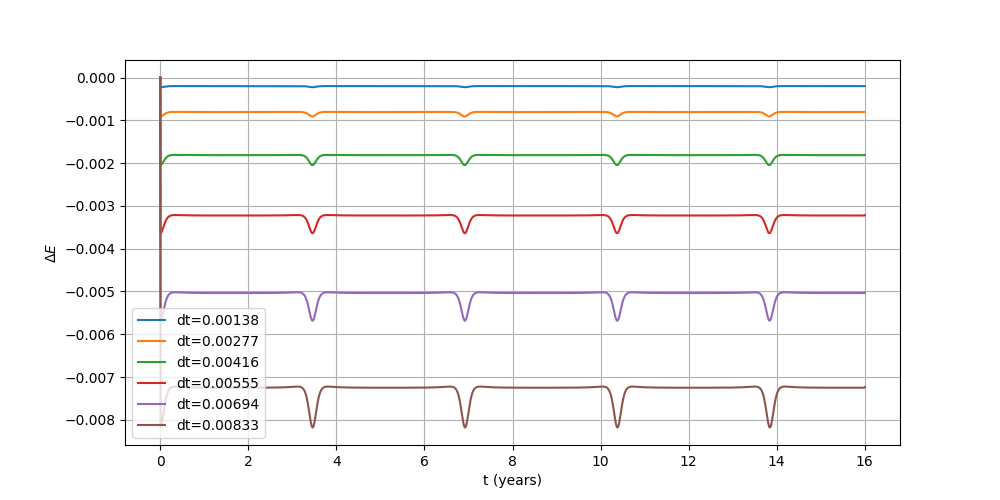

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            displacement = displacement/distance_cubed
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

# Define computational units: masses in solar masses, distances in AUs, time in Earth years
G=4.0*np.pi**2

# System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
N=2
mass=np.array([1.00,0.1])

# Choose orbital period of 1.0 Earth year
T=1.0
w=2.0*np.pi/T

# Kepler's 3rd Law to compute semi-major axis
M=np.sum(mass)
a=(G*M/w**2)**(1.0/3.0)

# Initial positions: place two masses on x-axis with center-of-mass at origin
# rows: different masses; columns: x, y, z coordinates
position=np.zeros([N,3])
position[0,:]=np.array([-a*mass[1]/M,0,0])
position[1,:]=np.array([+a*mass[0]/M,0,0])

position2=np.zeros([N,3])
position2[0,:]=np.array([-a*mass[1]/M,0,0])
position2[1,:]=np.array([+a*mass[0]/M,0,0])

position3=np.zeros([N,3])
position3[0,:]=np.array([-a*mass[1]/M,0,0])
position3[1,:]=np.array([+a*mass[0]/M,0,0])

position4=np.zeros([N,3])
position4[0,:]=np.array([-a*mass[1]/M,0,0])
position4[1,:]=np.array([+a*mass[0]/M,0,0])

position5=np.zeros([N,3])
position5[0,:]=np.array([-a*mass[1]/M,0,0])
position5[1,:]=np.array([+a*mass[0]/M,0,0])

position6=np.zeros([N,3])
position6[0,:]=np.array([-a*mass[1]/M,0,0])
position6[1,:]=np.array([+a*mass[0]/M,0,0])



# Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
# rows: different masses; columns: x, y, z components of velocity
velocity=np.zeros([N,3])
velocity[0,:]=np.array([0,position[0,0],0])*w*1.25
velocity[1,:]=np.array([0,position[1,0],0])*w*1.25


# Step size and number of time steps
dthold = []
for i in range(1,7,1):
    dt=(T/720.0)*i
    dthold.append(dt)

    
tot_time=16.0
num_steps=np.ceil(tot_time/dthold[0]).astype(int)
num_steps2=np.ceil(tot_time/dthold[1]).astype(int)
num_steps3=np.ceil(tot_time/dthold[2]).astype(int)
num_steps4=np.ceil(tot_time/dthold[3]).astype(int)
num_steps5=np.ceil(tot_time/dthold[4]).astype(int)
num_steps6=np.ceil(tot_time/dthold[5]).astype(int)


positions=np.zeros([N,3,num_steps+1])
positions2=np.zeros([N,3,num_steps2+1])
positions3=np.zeros([N,3,num_steps3+1])
positions4=np.zeros([N,3,num_steps4+1])
positions5=np.zeros([N,3,num_steps5+1])
positions6=np.zeros([N,3,num_steps6+1])


positions[:,:,0]=position
positions2[:,:,0]=position2
positions3[:,:,0]=position3
positions4[:,:,0]=position4
positions5[:,:,0]=position5
positions6[:,:,0]=position6


# First time step
acceleration=G*accel_grav(mass,position)
acceleration2=G*accel_grav(mass,position2)
acceleration3=G*accel_grav(mass,position3)
acceleration4=G*accel_grav(mass,position4)
acceleration5=G*accel_grav(mass,position5)
acceleration6=G*accel_grav(mass,position6)

position_new=first_step(position,velocity,acceleration,dthold[0])
position_new2=first_step(position2,velocity,acceleration2,dthold[1])
position_new3=first_step(position3,velocity,acceleration3,dthold[2])
position_new4=first_step(position4,velocity,acceleration4,dthold[3])
position_new5=first_step(position5,velocity,acceleration5,dthold[4])
position_new6=first_step(position6,velocity,acceleration6,dthold[5])

position_old=position
position_old2=position2
position_old3=position3
position_old4=position4
position_old5=position5
position_old6=position6

position=position_new
position2=position_new2
position3=position_new3
position4=position_new4
position5=position_new5
position6=position_new6

positions[:,:,1]=position
positions2[:,:,1]=position2
positions3[:,:,1]=position3
positions4[:,:,1]=position4
positions5[:,:,1]=position5
positions6[:,:,1]=position6




# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    acceleration=G*accel_grav(mass,position)
    position_new=verlet_step(position,position_old,acceleration,dthold[0])
    position_old=position
    position=position_new
    positions[:,:,t]=position
    
for t in range(2,num_steps2+1):
    acceleration2=G*accel_grav(mass,position2)
    position_new2=verlet_step(position2,position_old2,acceleration2,dthold[1])
    position_old2=position2
    position2=position_new2
    positions2[:,:,t]=position2

for t in range(2,num_steps3+1):
    acceleration3=G*accel_grav(mass,position3)
    position_new3=verlet_step(position3,position_old3,acceleration3,dthold[2])
    position_old3=position3
    position3=position_new3
    positions3[:,:,t]=position3
    
for t in range(2,num_steps4+1):
    acceleration4=G*accel_grav(mass,position4)
    position_new4=verlet_step(position4,position_old4,acceleration4,dthold[3])
    position_old4=position4
    position4=position_new4
    positions4[:,:,t]=position4
    
for t in range(2,num_steps5+1):
    acceleration5=G*accel_grav(mass,position5)
    position_new5=verlet_step(position5,position_old5,acceleration5,dthold[4])
    position_old5=position5
    position5=position_new5
    positions5[:,:,t]=position5

for t in range(2,num_steps6+1):
    acceleration6=G*accel_grav(mass,position6)
    position_new6=verlet_step(position6,position_old6,acceleration6,dthold[5])
    position_old6=position6
    position6=position_new6
    positions6[:,:,t]=position6
    
    
    
plt.plot(positions[1,0,:],positions[1,1,:],'b-',positions[0,0,:],positions[0,1,:],'r-')
plt.axis('equal');
plt.xlabel('x (AU)');
plt.ylabel('y (AU)');


def pos2Vel(xpos,ypos,dt):
    
    l = len(xpos)
    
  
    
    velx = np.empty(l)
    vely = np.empty(l)
    
    for i in range(1,l-1):
        velx[i] = (xpos[i+1] - xpos[i-1])/(2.0*dt)
        vely[i] = (ypos[i+1] - ypos[i-1])/(2.0*dt)
        
    velx[0] = (1/dt)*( (-3/2)*xpos[0] + 2.0*xpos[1] - 0.5*xpos[2] ) 
    vely[0] = (1/dt)*( (-3/2)*ypos[0] + 2.0*ypos[1] - 0.5*ypos[2] )
    
    velx[l-1] = (1/dt)*( (3/2)*xpos[l-1] - 2.0*xpos[l-2] +0.5*xpos[l-3] )
    vely[l-1] = (1/dt)*( (3/2)*ypos[l-1] - 2.0*ypos[l-2] +0.5*ypos[l-3] )

    #return np.vstack((velx,vely))
    return np.array([velx,vely])


vel0 = pos2Vel(positions[0,0,:],positions[0,1,:],dthold[0]) # particle 1 
vel1 = pos2Vel(positions[1,0,:],positions[1,1,:],dthold[0]) # particle 2
velmag0 = np.sqrt(vel0[0,:]**2 + vel0[1,:]**2)    
velmag1 = np.sqrt(vel1[0,:]**2 + vel1[1,:]**2)    
#
vel02 = pos2Vel(positions2[0,0,:],positions2[0,1,:],dthold[1]) # particle 1 
vel12 = pos2Vel(positions2[1,0,:],positions2[1,1,:],dthold[1]) # particle 2
velmag02 = np.sqrt(vel02[0,:]**2 + vel02[1,:]**2)    
velmag12 = np.sqrt(vel12[0,:]**2 + vel12[1,:]**2)    
#
vel03 = pos2Vel(positions3[0,0,:],positions3[0,1,:],dthold[2]) # particle 1 
vel13 = pos2Vel(positions3[1,0,:],positions3[1,1,:],dthold[2]) # particle 2
velmag03 = np.sqrt(vel03[0,:]**2 + vel03[1,:]**2)    
velmag13 = np.sqrt(vel13[0,:]**2 + vel13[1,:]**2)  
#
vel04 = pos2Vel(positions4[0,0,:],positions4[0,1,:],dthold[3]) # particle 1 
vel14 = pos2Vel(positions4[1,0,:],positions4[1,1,:],dthold[3]) # particle 2
velmag04 = np.sqrt(vel04[0,:]**2 + vel04[1,:]**2)    
velmag14 = np.sqrt(vel14[0,:]**2 + vel14[1,:]**2)   
#
vel05 = pos2Vel(positions5[0,0,:],positions5[0,1,:],dthold[4]) # particle 1 
vel15 = pos2Vel(positions5[1,0,:],positions5[1,1,:],dthold[4]) # particle 2
velmag05 = np.sqrt(vel05[0,:]**2 + vel05[1,:]**2)    
velmag15 = np.sqrt(vel15[0,:]**2 + vel15[1,:]**2)   
#
vel06 = pos2Vel(positions6[0,0,:],positions6[0,1,:],dthold[5]) # particle 1 
vel16 = pos2Vel(positions6[1,0,:],positions6[1,1,:],dthold[5]) # particle 2
velmag06 = np.sqrt(vel06[0,:]**2 + vel06[1,:]**2)    
velmag16 = np.sqrt(vel16[0,:]**2 + vel16[1,:]**2)   

    
def KE(mass,velmagnitude0,velmagnitude1):
    
    KETot = 0.5*mass[0]*(velmagnitude0**2) + 0.5*mass[1]*(velmagnitude1**2)
    
    return KETot


def PE(mass,xpos1,xpos2,ypos1,ypos2):
    
    
    distance = np.sqrt( (xpos1-xpos2)**2 + (ypos1-ypos2)**2  )
    
    PETot = (-G*mass[0]*mass[1])/distance
    
    return PETot



totalKE = KE(mass,velmag0,velmag1)
totalPE = PE(mass,positions[0,0,:],positions[1,0,:],positions[0,1,:],positions[1,1,:])

totalKE2 = KE(mass,velmag02,velmag12)
totalPE2 = PE(mass,positions2[0,0,:],positions2[1,0,:],positions2[0,1,:],positions2[1,1,:])

totalKE3 = KE(mass,velmag03,velmag13)
totalPE3 = PE(mass,positions3[0,0,:],positions3[1,0,:],positions3[0,1,:],positions3[1,1,:])

totalKE4 = KE(mass,velmag04,velmag14)
totalPE4 = PE(mass,positions4[0,0,:],positions4[1,0,:],positions4[0,1,:],positions4[1,1,:])

totalKE5 = KE(mass,velmag05,velmag15)
totalPE5 = PE(mass,positions5[0,0,:],positions5[1,0,:],positions5[0,1,:],positions5[1,1,:])

totalKE6 = KE(mass,velmag06,velmag16)
totalPE6 = PE(mass,positions6[0,0,:],positions6[1,0,:],positions6[0,1,:],positions6[1,1,:])

totalE = totalKE + totalPE
totalE2 = totalKE2 + totalPE2
totalE3 = totalKE3 + totalPE3
totalE4 = totalKE4 + totalPE4
totalE5 = totalKE5 + totalPE5
totalE6 = totalKE6 + totalPE6

tspan = np.linspace(0,tot_time,len(velmag0))
tspan2 = np.linspace(0,tot_time,len(velmag02))
tspan3 = np.linspace(0,tot_time,len(velmag03))
tspan4 = np.linspace(0,tot_time,len(velmag04))
tspan5 = np.linspace(0,tot_time,len(velmag05))
tspan6 = np.linspace(0,tot_time,len(velmag06))



fig1 = plt.figure(figsize=(10,5))

plt.plot(tspan,totalKE,label='KE')
plt.plot(tspan,totalPE,label='PE')
plt.plot(tspan,totalE,label='KE+PE')
plt.grid(True)
plt.legend()
plt.xlim(0,16)
plt.xlabel('t (years)')
plt.ylabel('Energy')
plt.show()

fig1.savefig('energyEllipse.pdf',bbox_inches='tight')

#difference in energy 

fig2 = plt.figure(figsize=(10,5))
plt.plot(tspan,totalE-totalE[0],label='dt=0.00138')
plt.plot(tspan2,totalE2-totalE2[0],label='dt=0.00277')
plt.plot(tspan3,totalE3-totalE3[0],label='dt=0.00416')
plt.plot(tspan4,totalE4-totalE4[0],label='dt=0.00555')
plt.plot(tspan5,totalE5-totalE5[0],label='dt=0.00694')
plt.plot(tspan6,totalE6-totalE6[0],label='dt=0.00833')
plt.grid()
plt.legend()
plt.xlabel('t (years)')
plt.ylabel('$\Delta E$')
plt.show()

fig2.savefig('deltaE_Ellipse.pdf',bbox_inches='tight')

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt

def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            displacement = displacement/distance_cubed
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

# Define computational units: masses in solar masses, distances in AUs, time in Earth years
G=4.0*np.pi**2

# System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
N=2
mass=np.array([1.00,0.1])

# Choose orbital period of 1.0 Earth year
T=1.0
w=2.0*np.pi/T

# Kepler's 3rd Law to compute semi-major axis
M=np.sum(mass)
a=(G*M/w**2)**(1.0/3.0)

# Initial positions: place two masses on x-axis with center-of-mass at origin
# rows: different masses; columns: x, y, z coordinates
position=np.zeros([N,3])
position[0,:]=np.array([-a*mass[1]/M,0,0])
position[1,:]=np.array([+a*mass[0]/M,0,0])

# Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
# rows: different masses; columns: x, y, z components of velocity
velocity=np.zeros([N,3])
velocity[0,:]=np.array([0,position[0,0],0])*w*1.25
velocity[1,:]=np.array([0,position[1,0],0])*w*1.25


# Step size and number of time steps
dt=T/720.0
tot_time=16.0
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position

# First time step
acceleration=G*accel_grav(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position

# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    acceleration=G*accel_grav(mass,position)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position
    
%matplotlib notebook 

fig = plt.figure(figsize=(10,5))
plt.plot(positions[1,0,:],positions[1,1,:],'b-',positions[0,0,:],positions[0,1,:],'r-')
plt.axis('equal');
plt.xlabel('x (AU)');
plt.ylabel('y (AU)');


def pos2Vel(xpos,ypos,dt):
    
    l = len(xpos)
    
    velx = np.empty(l)
    vely = np.empty(l)
    
    for i in range(1,l-1):
        velx[i] = (xpos[i+1] - xpos[i-1])/(2.0*dt)
        vely[i] = (ypos[i+1] - ypos[i-1])/(2.0*dt)
        
    velx[0] = (1/dt)*( (-3/2)*xpos[0] + 2.0*xpos[1] - 0.5*xpos[2] ) 
    vely[0] = (1/dt)*( (-3/2)*ypos[0] + 2.0*ypos[1] - 0.5*ypos[2] )
    
    velx[l-1] = (1/dt)*( (3/2)*xpos[l-1] - 2.0*xpos[l-2] +0.5*xpos[l-3] )
    vely[l-1] = (1/dt)*( (3/2)*ypos[l-1] - 2.0*ypos[l-2] +0.5*ypos[l-3] )

    #return np.vstack((velx,vely))
    return np.array([velx,vely])


#integrating backwards
l = len(positions[0,0,:])-1

position = np.empty([N,3])
position[0,:] = np.array([positions[0,0,l],positions[0,1,l],0])
position[1,:] = np.array([positions[1,0,l],positions[1,1,l],0])


velocity[0,:] = -np.array([(1/dt)*(1.5*positions[0,0,l]-2*positions[0,0,l-1]+0.5*positions[0,0,l-2]),
                 (1/dt)*(1.5*positions[0,1,l]-2*positions[0,1,l-1]+0.5*positions[0,1,l-2]),0])

velocity[1,:] = -np.array([(1/dt)*(1.5*positions[1,0,l]-2*positions[1,0,l-1]+0.5*positions[1,0,l-2]),
                 (1/dt)*(1.5*positions[1,1,l]-2*positions[1,1,l-1]+0.5*positions[1,1,l-2]),0])


holdpos = np.empty([N,3,num_steps+1])
holdpos[:,:,0] = position

#first time step

acceleration = G*accel_grav(mass,position)
position_new = first_step(position,velocity,acceleration,dt)
position_old = position
position = position_new
holdpos[:,:,1] = position

for t in range(2,num_steps+1):
    acceleration = G*accel_grav(mass,position)
    position_new = verlet_step(position,position_old,acceleration,dt)
    position_old = position 
    position = position_new 
    holdpos[:,:,t] = position
    
    
plt.plot(holdpos[0,0,:],holdpos[0,1,:],'g-',holdpos[1,0,:],holdpos[1,1,:],'k-')



In [97]:
a = np.array([0,1,2,3,4,5,6,7,8])
l = len(a)
print(l)
print(a[0])
print([a[1]])
print([a[2]])
print([a[3]])
print([a[4]])
print([a[5]])
print([a[6]])
print([a[7]])
print([a[8]])


x = np.empty([2,2])

x[0,:] = [(1),(2)]

print(x[0,:])

print('')
dthold = []

for i in range(1,27,5):
    dt = (1/720)*(i)
    print(dt)
    dthold.append(dt)
    
print('')

print(dthold[0])
print(dthold[1]) 


9
0
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[1. 2.]

0.001388888888888889
0.008333333333333333
0.015277777777777779
0.022222222222222223
0.029166666666666667
0.036111111111111115

0.001388888888888889
0.008333333333333333


[0.93843647 0.         0.        ]


<IPython.core.display.Javascript object>


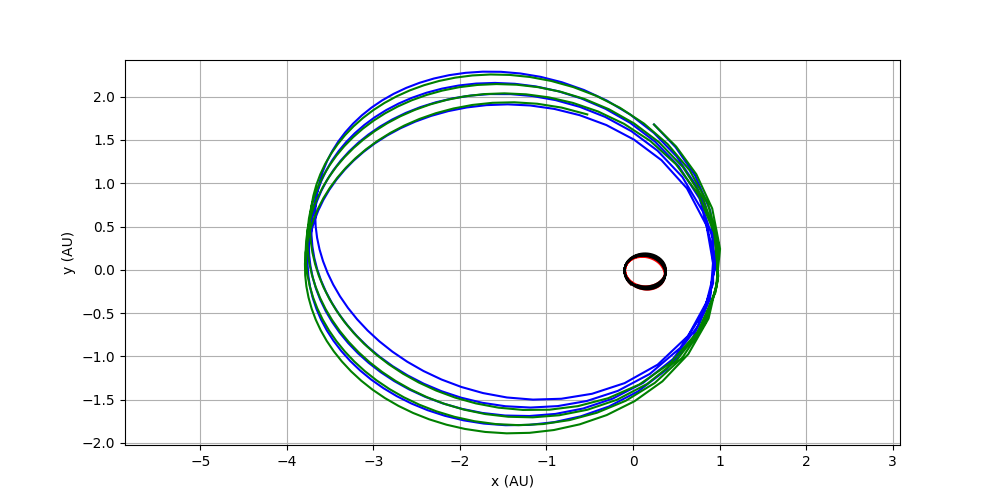

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def mainProg():
        # Define computational units: masses in solar masses, distances in AUs, time in Earth years
    G=4.0*np.pi**2

    # System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
    N=2
    mass=np.array([1.00,0.1])

    # Choose orbital period of 1.0 Earth year
    T=1.0
    w=2.0*np.pi/T

    # Kepler's 3rd Law to compute semi-major axis
    M=np.sum(mass)
    a=(G*M/w**2)**(1.0/3.0)

    # Initial positions: place two masses on x-axis with center-of-mass at origin
    # rows: different masses; columns: x, y, z coordinates
    
    #part a#
    position=np.zeros([N,3])
    position2=np.zeros([N,3])
    position[0,:]=np.array([-a*mass[1]/M,0,0])
    position[1,:]=np.array([+a*mass[0]/M,0,0])
    #end of part a#
    
    #part b#
    

    # Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
    # rows: different masses; columns: x, y, z components of velocity
    
    #part a#
    velocity=np.zeros([N,3])
    velocity[0,:]=np.array([0,position[0,0],0])*w*1.25
    velocity[1,:]=np.array([0,position[1,0],0])*w*1.25
    #end of part a#
    
    #part b#
    
    #end of part b#
    
  

    # Step size and number of time steps
    dt=T/720.0 * (50.0)
    tot_time=16.0
    num_steps=np.ceil(tot_time/dt).astype(int)
    #part a#
    positions=np.zeros([N,3,num_steps+1])
    positions[:,:,0]=position
    #end of a#
    #part b#
   # positions2=np.zeros([N,3,num_steps+1])
    
    #end of b#
     
    
    #part a - first step#
    acceleration=G*accel_grav(mass,position)
    position_new=first_step(position,velocity,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,1]=position
    #end of part a#
    
    
    #part a#
    for t in range(2,num_steps+1):
        acceleration=G*accel_grav(mass,position)
        position_new=verlet_step(position,position_old,acceleration,dt)
        position_old=position
        position=position_new
        positions[:,:,t]=position
    
    #end of part a
    
    #part b
    
    l = len(positions[0,0,:])-1
    
    position2[0,:] = np.array([positions[0,0,l],positions[0,1,l],0])
    position2[1,:] = np.array([positions[1,0,l],positions[1,1,l],0])
    
    
    velocity2 = np.empty([N,3])
    
    velocity2[0,:] = -np.array([(1/dt)*(1.5*positions[0,0,l]-2*positions[0,0,l-1]+0.5*positions[0,0,l-2]),
                 (1/dt)*(1.5*positions[0,1,l]-2*positions[0,1,l-1]+0.5*positions[0,1,l-2]),0])

    velocity2[1,:] = -np.array([(1/dt)*(1.5*positions[1,0,l]-2*positions[1,0,l-1]+0.5*positions[1,0,l-2]),
                 (1/dt)*(1.5*positions[1,1,l]-2*positions[1,1,l-1]+0.5*positions[1,1,l-2]),0])
    
    
    positions2 = np.zeros([N,3,num_steps+1])
    positions2[:,:,0]=position2
    
    # First time step
    
    
    #part b - first time step#
    
    acceleration2=G*accel_grav(mass,position2)
    position_new2=first_step(position2,velocity2,acceleration2,dt)
    position_old2=position2
    position2=position_new2
    positions2[:,:,1]=position2
    

    #end of part b#
    
    # Loop through time steps 2 through num_steps
  
    #part b#
    for t in range(2,num_steps+1):
        acceleration2=G*accel_grav(mass,position2)
        position_new2=verlet_step(position2,position_old2,acceleration2,dt)
        position_old2=position2
        position2=position_new2
        positions2[:,:,t]=position2
 

    %matplotlib notebook 
    
    fig = plt.figure(figsize=(10,5))
    plt.plot(positions[1,0,:],positions[1,1,:],'b-',positions[0,0,:],positions[0,1,:],'r-')
    plt.plot(positions2[1,0,:],positions2[1,1,:],'g-',positions2[0,0,:],positions2[0,1,:],'k-')
    plt.axis('equal');
    plt.xlabel('x (AU)');
    plt.ylabel('y (AU)');
    plt.grid()

   
  
#end of main program#

#start of defining our functions# 

def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            displacement = displacement/distance_cubed
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration


def pos2Vel(xpos,ypos,dt):
    
    l = len(xpos)
    
    velx = np.empty(l)
    vely = np.empty(l)
    
    for i in range(1,l-1):
        velx[i] = (xpos[i+1] - xpos[i-1])/(2.0*dt)
        vely[i] = (ypos[i+1] - ypos[i-1])/(2.0*dt)
        
    velx[0] = (1/dt)*( (-3/2)*xpos[0] + 2.0*xpos[1] - 0.5*xpos[2] ) 
    vely[0] = (1/dt)*( (-3/2)*ypos[0] + 2.0*ypos[1] - 0.5*ypos[2] )
    
    velx[l-1] = (1/dt)*( (3/2)*xpos[l-1] - 2.0*xpos[l-2] +0.5*xpos[l-3] )
    vely[l-1] = (1/dt)*( (3/2)*ypos[l-1] - 2.0*ypos[l-2] +0.5*ypos[l-3] )

    #return np.vstack((velx,vely))
    return np.array([velx,vely])

if __name__=='__main__':
    mainProg()

<IPython.core.display.Javascript object>


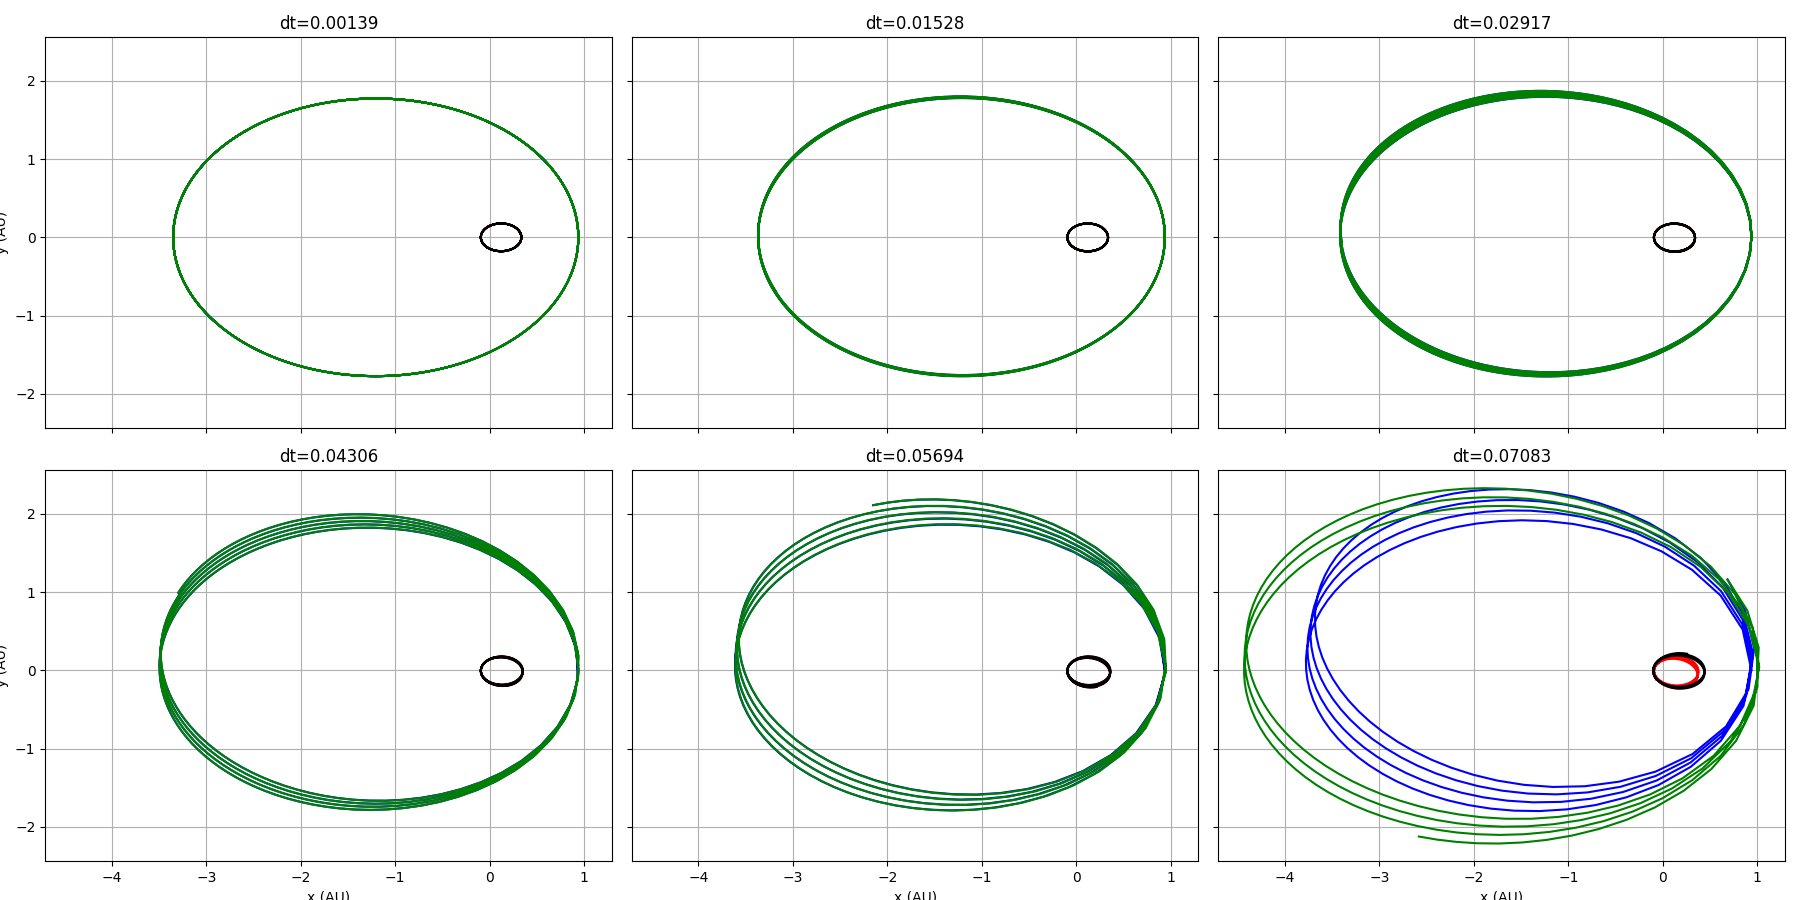

<IPython.core.display.Javascript object>


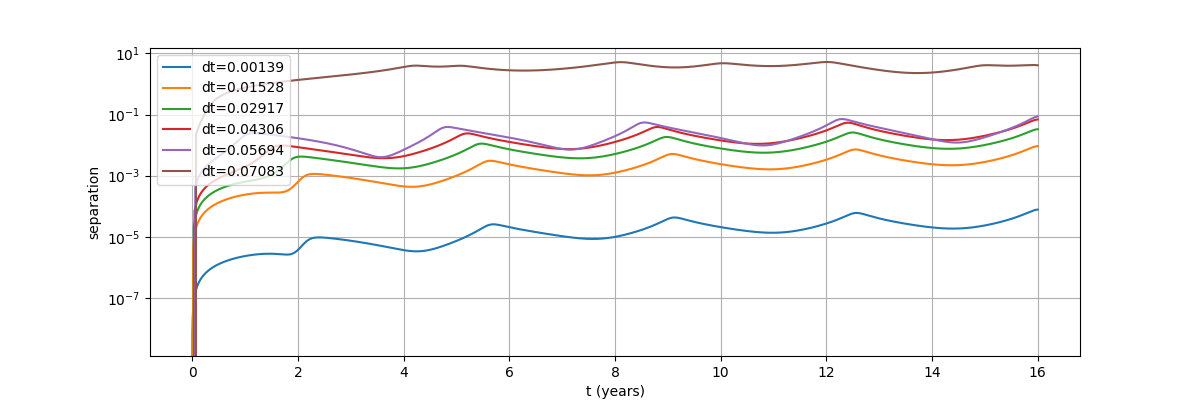

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def mainProg():
        # Define computational units: masses in solar masses, distances in AUs, time in Earth years
    G=4.0*np.pi**2

    # System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
    N=2
    mass=np.array([1.00,0.1])

    # Choose orbital period of 1.0 Earth year
    T=1.0
    w=2.0*np.pi/T

    # Kepler's 3rd Law to compute semi-major axis
    M=np.sum(mass)
    a=(G*M/w**2)**(1.0/3.0)

    # Initial positions: place two masses on x-axis with center-of-mass at origin
    # rows: different masses; columns: x, y, z coordinates
    
    #part a#
    position=np.zeros([N,3])
    position[0,:]=np.array([-a*mass[1]/M,0,0])
    position[1,:]=np.array([+a*mass[0]/M,0,0])
    #end of part a#
    
    #part b#
    

    # Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
    # rows: different masses; columns: x, y, z components of velocity
    
    #part a#
    velocity=np.zeros([N,3])
    velocity[0,:]=np.array([0,position[0,0],0])*w*1.25
    velocity[1,:]=np.array([0,position[1,0],0])*w*1.25
    
    vxcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,0]) 
    vycom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,1])
   
    vcom = np.array([vxcom,vycom,0])


    
    velocity[0,:] = velocity[0,:] - vcom
    velocity[1,:] = velocity[1,:] - vcom
    
    
    #end of part a#
    
    #part b#
    
    #end of part b#
    
  
    dthold = []
    num_steps = []
    
    # Step size and number of time steps
    tot_time= 16.0
    for i in range(1,60,10):
        dt=(T/720.0) * i
        numsteps=np.ceil(tot_time/dt).astype(int)
        
        dthold.append(dt)
        num_steps.append(numsteps)
        
   
    
    #part a#
    
    #end of a#
    #part b#
   # positions2=np.zeros([N,3,num_steps+1])
    
    #end of b#
     

    
    posfor1 = goingForward(G,N,position,mass,velocity,dthold[0],num_steps[0])
    posback1 = goingBack(G,posfor1,mass,N,dthold[0],num_steps[0])
    
    posfor2 = goingForward(G,N,position,mass,velocity,dthold[1],num_steps[1])
    posback2 = goingBack(G,posfor2,mass,N,dthold[1],num_steps[1])
    
    posfor3 = goingForward(G,N,position,mass,velocity,dthold[2],num_steps[2])
    posback3 = goingBack(G,posfor3,mass,N,dthold[2],num_steps[2])
    
    posfor4 = goingForward(G,N,position,mass,velocity,dthold[3],num_steps[3])
    posback4 = goingBack(G,posfor4,mass,N,dthold[3],num_steps[3])
    
    posfor5 = goingForward(G,N,position,mass,velocity,dthold[4],num_steps[4])
    posback5 = goingBack(G,posfor5,mass,N,dthold[4],num_steps[4])
    
    posfor6 = goingForward(G,N,position,mass,velocity,dthold[5],num_steps[5])
    posback6 = goingBack(G,posfor6,mass,N,dthold[5],num_steps[5])
    
    #fig = plt.figure(figsize=(10,5))
    #plt.plot(posfor1[1,0,:],posfor1[1,1,:],'b-',posfor1[0,0,:],posfor1[0,1,:],'r-')
    #plt.plot(posback1[1,0,:],posback1[1,1,:],'g-',posback1[0,0,:],posback1[0,1,:],'k-')
    #plt.axis('equal');
    #plt.xlabel('x (AU)');
    #plt.ylabel('y (AU)');
    #plt.grid()
    
    fig,axes = plt.subplots(2,3,figsize=(18,9),sharex = True,sharey = True)
#    axes[0,0].plot(t,RK4(predPrey,r0,t))
#    axes[0,1].plot(t,RK4(predPrey,r0_2,t))
#    axes[1,0].plot(t,RK4(predPrey,r0_3,t))
#    axes[1,1].plot(t,RK4(predPrey,r0_4,t))
    axes[0,0].plot(posfor1[1,0,:],posfor1[1,1,:],'b-',posfor1[0,0,:],posfor1[0,1,:],'r-')
    axes[0,0].plot(posback1[1,0,:],posback1[1,1,:],'g-',posback1[0,0,:],posback1[0,1,:],'k-')
    axes[0,0].set_title('dt=' + "{:.5f}".format(dthold[0]) )
    
    
    axes[0,1].plot(posfor2[1,0,:],posfor2[1,1,:],'b-',posfor2[0,0,:],posfor2[0,1,:],'r-')
    axes[0,1].plot(posback2[1,0,:],posback2[1,1,:],'g-',posback2[0,0,:],posback2[0,1,:],'k-')
    axes[0,1].set_title('dt='+"{:.5f}".format(dthold[1]) ) 
    
    
    axes[0,2].plot(posfor3[1,0,:],posfor3[1,1,:],'b-',posfor3[0,0,:],posfor3[0,1,:],'r-')
    axes[0,2].plot(posback3[1,0,:],posback3[1,1,:],'g-',posback3[0,0,:],posback3[0,1,:],'k-')
    axes[0,2].set_title('dt='+"{:.5f}".format(dthold[2]) ) 
    

    axes[1,0].plot(posfor4[1,0,:],posfor4[1,1,:],'b-',posfor4[0,0,:],posfor4[0,1,:],'r-')
    axes[1,0].plot(posback4[1,0,:],posback4[1,1,:],'g-',posback4[0,0,:],posback4[0,1,:],'k-')
    axes[1,0].set_title('dt='+"{:.5f}".format(dthold[3]) ) 
    
    
    axes[1,1].plot(posfor5[1,0,:],posfor5[1,1,:],'b-',posfor5[0,0,:],posfor5[0,1,:],'r-')
    axes[1,1].plot(posback5[1,0,:],posback5[1,1,:],'g-',posback5[0,0,:],posback5[0,1,:],'k-')
    axes[1,1].set_title('dt='+"{:.5f}".format(dthold[4]) ) 
    
    
    axes[1,2].plot(posfor6[1,0,:],posfor6[1,1,:],'b-',posfor6[0,0,:],posfor6[0,1,:],'r-')
    axes[1,2].plot(posback6[1,0,:],posback6[1,1,:],'g-',posback6[0,0,:],posback6[0,1,:],'k-')
    axes[1,2].set_title('dt='+"{:.5f}".format(dthold[5]) ) 
    
   
    fig.tight_layout()
    
    for ax in axes.flat:
        #ax.set(xlabel='t (weeks)', ylabel='population')
        ax.grid(True)
        
    plt.setp(axes[-1, :], xlabel='x (AU)')
    plt.setp(axes[:, 0], ylabel='y (AU)')
    
    
    dist1 = np.sqrt( ( np.flip(posfor1[1,0,:]) - (posback1[1,0,:]))**2 + ( np.flip(posfor1[1,1,:]) - (posback1[1,1,:]))**2   )
    dist2 = np.sqrt( ( np.flip(posfor2[1,0,:]) - (posback2[1,0,:]))**2 + ( np.flip(posfor2[1,1,:]) - (posback2[1,1,:]))**2   )
    dist3 = np.sqrt( ( np.flip(posfor3[1,0,:]) - (posback3[1,0,:]))**2 + ( np.flip(posfor3[1,1,:]) - (posback3[1,1,:]))**2   )
    dist4 = np.sqrt( ( np.flip(posfor4[1,0,:]) - (posback4[1,0,:]))**2 + ( np.flip(posfor4[1,1,:]) - (posback4[1,1,:]))**2   )
    dist5 = np.sqrt( ( np.flip(posfor5[1,0,:]) - (posback5[1,0,:]))**2 + ( np.flip(posfor5[1,1,:]) - (posback5[1,1,:]))**2   )
    dist6 = np.sqrt( ( np.flip(posfor6[1,0,:]) - (posback6[1,0,:]))**2 + ( np.flip(posfor6[1,1,:]) - (posback6[1,1,:]))**2   )
    
    fig.savefig('forwardandbackwardVerlet.pdf',bbox_inches='tight')
    
    t1 = np.linspace(0,tot_time,len(dist1))
    t2 = np.linspace(0,tot_time,len(dist2))
    t3 = np.linspace(0,tot_time,len(dist3))
    t4 = np.linspace(0,tot_time,len(dist4))
    t5 = np.linspace(0,tot_time,len(dist5))
    t6 = np.linspace(0,tot_time,len(dist6))
    

    fig2 = plt.figure(figsize=(12,4))
    plt.plot(t1,dist1,label='dt='+"{:.5f}".format(dthold[0]))
    plt.plot(t2,dist2,label='dt='+"{:.5f}".format(dthold[1]))
    plt.plot(t3,dist3,label='dt='+"{:.5f}".format(dthold[2]))
    plt.plot(t4,dist4,label='dt='+"{:.5f}".format(dthold[3]))
    plt.plot(t5,dist5,label='dt='+"{:.5f}".format(dthold[4]))
    plt.plot(t6,dist6,label='dt='+"{:.5f}".format(dthold[5]))
    plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.xlabel('t (years)')
    plt.ylabel('separation')
    
    fig2.savefig('separationforandback.pdf',bbox_inches='tight')
    
    
#end of main program#

#start of defining our functions# 

def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            displacement = displacement/distance_cubed
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration


def goingForward(G,N,position,mass,velocity,dt,numsteps):
 #first step#

    positions=np.zeros([N,3,numsteps+1])
    positions[:,:,0]=position
    
    acceleration=G*accel_grav(mass,position)
    position_new=first_step(position,velocity,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,1]=position
    ##
    
   
    #making position arrays#
    for t in range(2,numsteps+1):
        acceleration=G*accel_grav(mass,position)
        position_new=verlet_step(position,position_old,acceleration,dt)
        position_old=position
        position=position_new
        positions[:,:,t]=position
        
    return positions

def goingBack(G,posin,mass,N,dt,numsteps):
     
    l = len(posin[0,0,:])-1
    
    posout=np.empty([N,3])

    posout[0,:] = np.array([posin[0,0,l],posin[0,1,l],0])
    posout[1,:] = np.array([posin[1,0,l],posin[1,1,l],0])
    
    
    velout = np.empty([N,3])
    
    velout[0,:] = -np.array([(1/dt)*(1.5*posin[0,0,l]-2*posin[0,0,l-1]+0.5*posin[0,0,l-2]),
                 (1/dt)*(1.5*posin[0,1,l]-2*posin[0,1,l-1]+0.5*posin[0,1,l-2]),0])

    velout[1,:] = -np.array([(1/dt)*(1.5*posin[1,0,l]-2*posin[1,0,l-1]+0.5*posin[1,0,l-2]),
                 (1/dt)*(1.5*posin[1,1,l]-2*posin[1,1,l-1]+0.5*posin[1,1,l-2]),0])
    
    posouts = np.empty([N,3,numsteps+1])
    posouts[:,:,0]=posout
    
    
    acceleration=G*accel_grav(mass,posout)
    position_new=first_step(posout,velout,acceleration,dt)
    position_old=posout
    posout=position_new
    posouts[:,:,1]=posout
    
    for t in range(2,numsteps+1):
        acceleration=G*accel_grav(mass,posout)
        position_new=verlet_step(posout,position_old,acceleration,dt)
        position_old=posout
        posout=position_new
        posouts[:,:,t]=posout
  
    return posouts


def pos2Vel(xpos,ypos,dt):
    
    l = len(xpos)
    
    velx = np.empty(l)
    vely = np.empty(l)
    
    for i in range(1,l-1):
        velx[i] = (xpos[i+1] - xpos[i-1])/(2.0*dt)
        vely[i] = (ypos[i+1] - ypos[i-1])/(2.0*dt)
        
    velx[0] = (1/dt)*( (-3/2)*xpos[0] + 2.0*xpos[1] - 0.5*xpos[2] ) 
    vely[0] = (1/dt)*( (-3/2)*ypos[0] + 2.0*ypos[1] - 0.5*ypos[2] )
    
    velx[l-1] = (1/dt)*( (3/2)*xpos[l-1] - 2.0*xpos[l-2] +0.5*xpos[l-3] )
    vely[l-1] = (1/dt)*( (3/2)*ypos[l-1] - 2.0*ypos[l-2] +0.5*ypos[l-3] )

    #return np.vstack((velx,vely))
    return np.array([velx,vely])

if __name__=='__main__':
    mainProg()

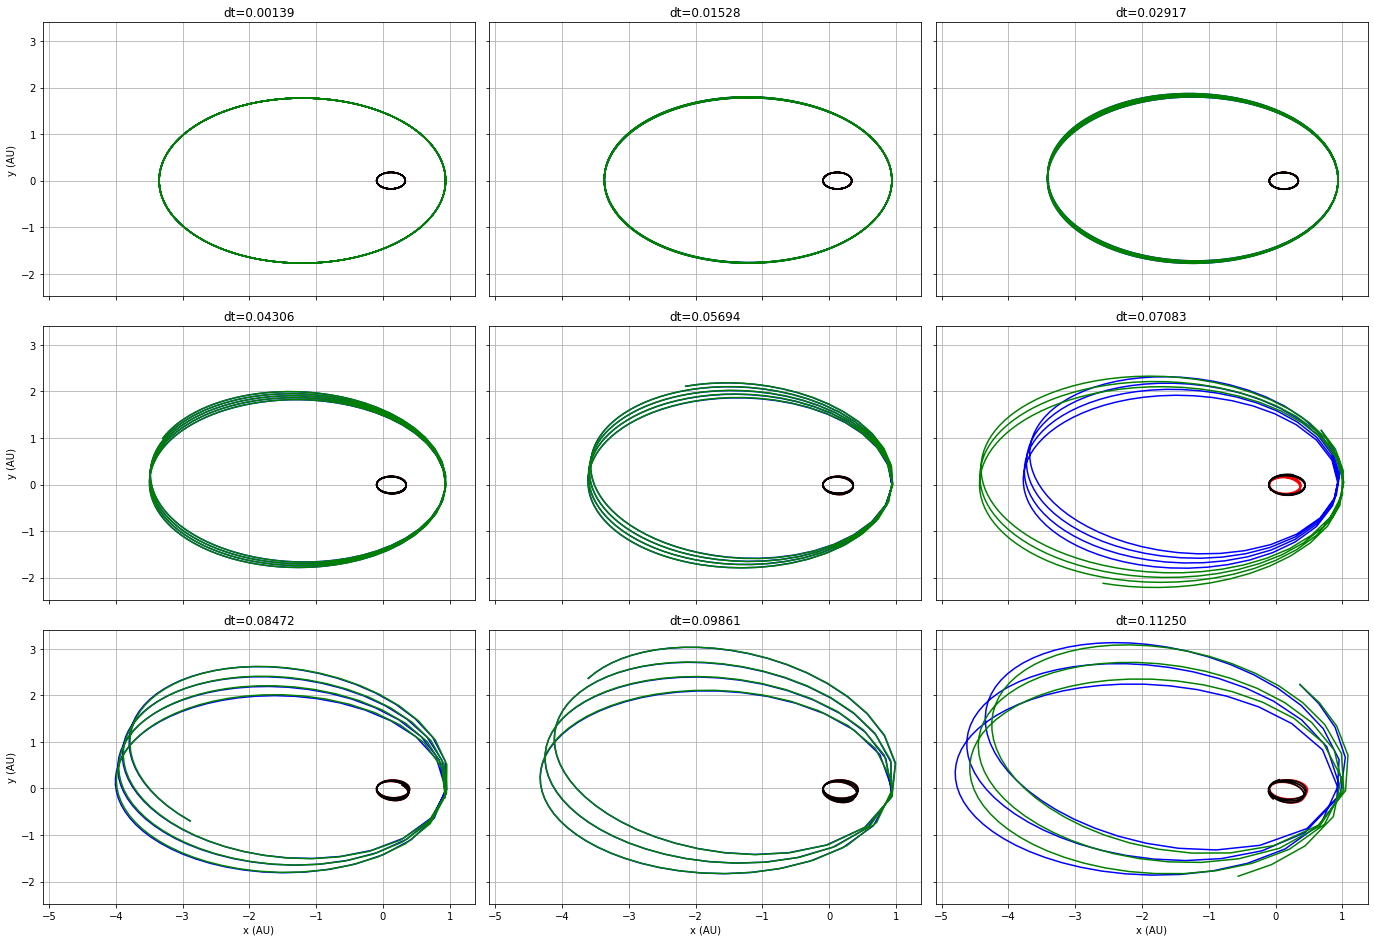

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def mainProg():
        # Define computational units: masses in solar masses, distances in AUs, time in Earth years
    G=4.0*np.pi**2

    # System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
    N=2
    mass=np.array([1.00,0.1])

    # Choose orbital period of 1.0 Earth year
    T=1.0
    w=2.0*np.pi/T

    # Kepler's 3rd Law to compute semi-major axis
    M=np.sum(mass)
    a=(G*M/w**2)**(1.0/3.0)

    # Initial positions: place two masses on x-axis with center-of-mass at origin
    # rows: different masses; columns: x, y, z coordinates
    
    #part a#
    position=np.zeros([N,3])
    position[0,:]=np.array([-a*mass[1]/M,0,0])
    position[1,:]=np.array([+a*mass[0]/M,0,0])
    #end of part a#
    
    #part b#
    

    # Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
    # rows: different masses; columns: x, y, z components of velocity
    
    #part a#
    velocity=np.zeros([N,3])
    velocity[0,:]=np.array([0,position[0,0],0])*w*1.25
    velocity[1,:]=np.array([0,position[1,0],0])*w*1.25
    #end of part a#
    
    #part b#
    
    #end of part b#
    
  
    dthold = []
    num_steps = []
    
    # Step size and number of time steps
    tot_time=16.0
    for i in range(1,91,10):
        dt=(T/720.0) * i
        numsteps=np.ceil(tot_time/dt).astype(int)
        
        dthold.append(dt)
        num_steps.append(numsteps)
        
   
    
    #part a#
    
    #end of a#
    #part b#
   # positions2=np.zeros([N,3,num_steps+1])
    
    #end of b#
     

    
    posfor1 = goingForward(G,N,position,mass,velocity,dthold[0],num_steps[0])
    posback1 = goingBack(G,posfor1,mass,N,dthold[0],num_steps[0])
    
    posfor2 = goingForward(G,N,position,mass,velocity,dthold[1],num_steps[1])
    posback2 = goingBack(G,posfor2,mass,N,dthold[1],num_steps[1])
    
    posfor3 = goingForward(G,N,position,mass,velocity,dthold[2],num_steps[2])
    posback3 = goingBack(G,posfor3,mass,N,dthold[2],num_steps[2])
    
    posfor4 = goingForward(G,N,position,mass,velocity,dthold[3],num_steps[3])
    posback4 = goingBack(G,posfor4,mass,N,dthold[3],num_steps[3])
    
    posfor5 = goingForward(G,N,position,mass,velocity,dthold[4],num_steps[4])
    posback5 = goingBack(G,posfor5,mass,N,dthold[4],num_steps[4])
    
    posfor6 = goingForward(G,N,position,mass,velocity,dthold[5],num_steps[5])
    posback6 = goingBack(G,posfor6,mass,N,dthold[5],num_steps[5])
    
    posfor7 = goingForward(G,N,position,mass,velocity,dthold[6],num_steps[6])
    posback7 = goingBack(G,posfor7,mass,N,dthold[6],num_steps[6])
    
    posfor8 = goingForward(G,N,position,mass,velocity,dthold[7],num_steps[7])
    posback8 = goingBack(G,posfor8,mass,N,dthold[7],num_steps[7])
    
    posfor9 = goingForward(G,N,position,mass,velocity,dthold[8],num_steps[8])
    posback9 = goingBack(G,posfor9,mass,N,dthold[8],num_steps[8])
    
    
    
    #fig = plt.figure(figsize=(10,5))
    #plt.plot(posfor1[1,0,:],posfor1[1,1,:],'b-',posfor1[0,0,:],posfor1[0,1,:],'r-')
    #plt.plot(posback1[1,0,:],posback1[1,1,:],'g-',posback1[0,0,:],posback1[0,1,:],'k-')
    #plt.axis('equal');
    #plt.xlabel('x (AU)');
    #plt.ylabel('y (AU)');
    #plt.grid()
    
    fig,axes = plt.subplots(3,3,figsize=(19,13),sharex = True,sharey = True)
#    axes[0,0].plot(t,RK4(predPrey,r0,t))
#    axes[0,1].plot(t,RK4(predPrey,r0_2,t))
#    axes[1,0].plot(t,RK4(predPrey,r0_3,t))
#    axes[1,1].plot(t,RK4(predPrey,r0_4,t))
    axes[0,0].plot(posfor1[1,0,:],posfor1[1,1,:],'b-',posfor1[0,0,:],posfor1[0,1,:],'r-')
    axes[0,0].plot(posback1[1,0,:],posback1[1,1,:],'g-',posback1[0,0,:],posback1[0,1,:],'k-')
    axes[0,0].set_title('dt=' + "{:.5f}".format(dthold[0]) ) 
    
    axes[0,1].plot(posfor2[1,0,:],posfor2[1,1,:],'b-',posfor2[0,0,:],posfor2[0,1,:],'r-')
    axes[0,1].plot(posback2[1,0,:],posback2[1,1,:],'g-',posback2[0,0,:],posback2[0,1,:],'k-')
    axes[0,1].set_title('dt='+"{:.5f}".format(dthold[1]) ) 
    
    axes[0,2].plot(posfor3[1,0,:],posfor3[1,1,:],'b-',posfor3[0,0,:],posfor3[0,1,:],'r-')
    axes[0,2].plot(posback3[1,0,:],posback3[1,1,:],'g-',posback3[0,0,:],posback3[0,1,:],'k-')
    axes[0,2].set_title('dt='+"{:.5f}".format(dthold[2]) )  

    axes[1,0].plot(posfor4[1,0,:],posfor4[1,1,:],'b-',posfor4[0,0,:],posfor4[0,1,:],'r-')
    axes[1,0].plot(posback4[1,0,:],posback4[1,1,:],'g-',posback4[0,0,:],posback4[0,1,:],'k-')
    axes[1,0].set_title('dt='+"{:.5f}".format(dthold[3]) ) 
    
    axes[1,1].plot(posfor5[1,0,:],posfor5[1,1,:],'b-',posfor5[0,0,:],posfor5[0,1,:],'r-')
    axes[1,1].plot(posback5[1,0,:],posback5[1,1,:],'g-',posback5[0,0,:],posback5[0,1,:],'k-')
    axes[1,1].set_title('dt='+"{:.5f}".format(dthold[4]) ) 
     
    axes[1,2].plot(posfor6[1,0,:],posfor6[1,1,:],'b-',posfor6[0,0,:],posfor6[0,1,:],'r-')
    axes[1,2].plot(posback6[1,0,:],posback6[1,1,:],'g-',posback6[0,0,:],posback6[0,1,:],'k-')
    axes[1,2].set_title('dt='+"{:.5f}".format(dthold[5]) )
    
    axes[2,0].plot(posfor7[1,0,:],posfor7[1,1,:],'b-',posfor7[0,0,:],posfor7[0,1,:],'r-')
    axes[2,0].plot(posback7[1,0,:],posback7[1,1,:],'g-',posback7[0,0,:],posback7[0,1,:],'k-')
    axes[2,0].set_title('dt='+"{:.5f}".format(dthold[6]) )
    
    axes[2,1].plot(posfor8[1,0,:],posfor8[1,1,:],'b-',posfor8[0,0,:],posfor8[0,1,:],'r-')
    axes[2,1].plot(posback8[1,0,:],posback8[1,1,:],'g-',posback8[0,0,:],posback8[0,1,:],'k-')
    axes[2,1].set_title('dt='+"{:.5f}".format(dthold[7]) )
    
    axes[2,2].plot(posfor9[1,0,:],posfor9[1,1,:],'b-',posfor9[0,0,:],posfor9[0,1,:],'r-')
    axes[2,2].plot(posback9[1,0,:],posback9[1,1,:],'g-',posback9[0,0,:],posback9[0,1,:],'k-')
    axes[2,2].set_title('dt='+"{:.5f}".format(dthold[8]) )
    
    
    fig.tight_layout()
    
    for ax in axes.flat:
        #ax.set(xlabel='t (weeks)', ylabel='population')
        ax.grid(True)
        
    plt.setp(axes[-1, :], xlabel='x (AU)')
    plt.setp(axes[:, 0], ylabel='y (AU)')
    
    
    
    #distance apart from smaller mass: 
    
    dist1 = np.sqrt( (posfor1[1,0,:] - posback1[1,0,:])**2 + (posfor1[1,1,:] - posback1[1,1,:])**2   )
    dist2 = np.sqrt( (posfor2[1,0,:] - posback2[1,0,:])**2 + (posfor2[1,1,:] - posback2[1,1,:])**2   )
    dist3 = np.sqrt( (posfor3[1,0,:] - posback3[1,0,:])**2 + (posfor3[1,1,:] - posback3[1,1,:])**2   )
    dist4 = np.sqrt( (posfor4[1,0,:] - posback4[1,0,:])**2 + (posfor4[1,1,:] - posback4[1,1,:])**2   )
    dist5 = np.sqrt( (posfor5[1,0,:] - posback5[1,0,:])**2 + (posfor5[1,1,:] - posback5[1,1,:])**2   )
    dist6 = np.sqrt( (posfor6[1,0,:] - posback6[1,0,:])**2 + (posfor6[1,1,:] - posback6[1,1,:])**2   )
    
    t1 = np.linspace(0,tot_time,len(posfor1))
    t2 = np.linspace(0,tot_time,len(posfor2))
    t3 = np.linspace(0,tot_time,len(posfor3))
    t4 = np.linspace(0,tot_time,len(posfor4))
    t5 = np.linspace(0,tot_time,len(posfor5))
    t6 = np.linspace(0,tot_time,len(posfor6))
    
#end of main program#

#start of defining our functions# 

def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            displacement = displacement/distance_cubed
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration


def goingForward(G,N,position,mass,velocity,dt,numsteps):
 #first step#

    positions=np.zeros([N,3,numsteps+1])
    positions[:,:,0]=position
    
    acceleration=G*accel_grav(mass,position)
    position_new=first_step(position,velocity,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,1]=position
    ##
    
   
    #making position arrays#
    for t in range(2,numsteps+1):
        acceleration=G*accel_grav(mass,position)
        position_new=verlet_step(position,position_old,acceleration,dt)
        position_old=position
        position=position_new
        positions[:,:,t]=position
        
    return positions

def goingBack(G,posin,mass,N,dt,numsteps):
     
    l = len(posin[0,0,:])-1
    
    posout=np.empty([N,3])

    posout[0,:] = np.array([posin[0,0,l],posin[0,1,l],0])
    posout[1,:] = np.array([posin[1,0,l],posin[1,1,l],0])
    
    
    velout = np.empty([N,3])
    
    velout[0,:] = -np.array([(1/dt)*(1.5*posin[0,0,l]-2*posin[0,0,l-1]+0.5*posin[0,0,l-2]),
                 (1/dt)*(1.5*posin[0,1,l]-2*posin[0,1,l-1]+0.5*posin[0,1,l-2]),0])

    velout[1,:] = -np.array([(1/dt)*(1.5*posin[1,0,l]-2*posin[1,0,l-1]+0.5*posin[1,0,l-2]),
                 (1/dt)*(1.5*posin[1,1,l]-2*posin[1,1,l-1]+0.5*posin[1,1,l-2]),0])
    
    posouts = np.empty([N,3,numsteps+1])
    posouts[:,:,0]=posout
    
    
    acceleration=G*accel_grav(mass,posout)
    position_new=first_step(posout,velout,acceleration,dt)
    position_old=posout
    posout=position_new
    posouts[:,:,1]=posout
    
    for t in range(2,numsteps+1):
        acceleration=G*accel_grav(mass,posout)
        position_new=verlet_step(posout,position_old,acceleration,dt)
        position_old=posout
        posout=position_new
        posouts[:,:,t]=posout
  
    return posouts


def pos2Vel(xpos,ypos,dt):
    
    l = len(xpos)
    
    velx = np.empty(l)
    vely = np.empty(l)
    
    for i in range(1,l-1):
        velx[i] = (xpos[i+1] - xpos[i-1])/(2.0*dt)
        vely[i] = (ypos[i+1] - ypos[i-1])/(2.0*dt)
        
    velx[0] = (1/dt)*( (-3/2)*xpos[0] + 2.0*xpos[1] - 0.5*xpos[2] ) 
    vely[0] = (1/dt)*( (-3/2)*ypos[0] + 2.0*ypos[1] - 0.5*ypos[2] )
    
    velx[l-1] = (1/dt)*( (3/2)*xpos[l-1] - 2.0*xpos[l-2] +0.5*xpos[l-3] )
    vely[l-1] = (1/dt)*( (3/2)*ypos[l-1] - 2.0*ypos[l-2] +0.5*ypos[l-3] )

    #return np.vstack((velx,vely))
    return np.array([velx,vely])

if __name__=='__main__':
    mainProg()

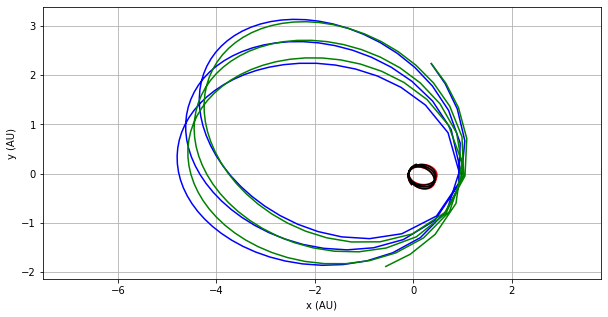

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def mainProg():
        # Define computational units: masses in solar masses, distances in AUs, time in Earth years
    G=4.0*np.pi**2

    # System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
    N=2
    mass=np.array([1.00,0.1])

    # Choose orbital period of 1.0 Earth year
    T=1.0
    w=2.0*np.pi/T

    # Kepler's 3rd Law to compute semi-major axis
    M=np.sum(mass)
    a=(G*M/w**2)**(1.0/3.0)

    # Initial positions: place two masses on x-axis with center-of-mass at origin
    # rows: different masses; columns: x, y, z coordinates
    
    #part a#
    position=np.zeros([N,3])
    position[0,:]=np.array([-a*mass[1]/M,0,0])
    position[1,:]=np.array([+a*mass[0]/M,0,0])
    #end of part a#
    
    #part b#
    

    # Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
    # rows: different masses; columns: x, y, z components of velocity
    
    #part a#
    velocity=np.zeros([N,3])
    velocity[0,:]=np.array([0,position[0,0],0])*w*1.25
    velocity[1,:]=np.array([0,position[1,0],0])*w*1.25
    #end of part a#
    
    #part b#
    
    #end of part b#
    
  
    dthold = []
    num_steps = []
    
    # Step size and number of time steps
    tot_time=16.0
    for i in range(1,91,10):
        dt=(T/720.0) * i
        numsteps=np.ceil(tot_time/dt).astype(int)
        
        dthold.append(dt)
        num_steps.append(numsteps)
        
   
    
    #part a#
    
    #end of a#
    #part b#
   # positions2=np.zeros([N,3,num_steps+1])
    
    #end of b#
     

    
    posfor1 = goingForward(G,N,position,mass,velocity,dthold[0],num_steps[0])
    posback1 = goingBack(G,posfor1,mass,N,dthold[0],num_steps[0])
    
    posfor2 = goingForward(G,N,position,mass,velocity,dthold[1],num_steps[1])
    posback2 = goingBack(G,posfor2,mass,N,dthold[1],num_steps[1])
    
    posfor3 = goingForward(G,N,position,mass,velocity,dthold[2],num_steps[2])
    posback3 = goingBack(G,posfor3,mass,N,dthold[2],num_steps[2])
    
    posfor4 = goingForward(G,N,position,mass,velocity,dthold[3],num_steps[3])
    posback4 = goingBack(G,posfor4,mass,N,dthold[3],num_steps[3])
    
    posfor5 = goingForward(G,N,position,mass,velocity,dthold[4],num_steps[4])
    posback5 = goingBack(G,posfor5,mass,N,dthold[4],num_steps[4])
    
    posfor6 = goingForward(G,N,position,mass,velocity,dthold[5],num_steps[5])
    posback6 = goingBack(G,posfor6,mass,N,dthold[5],num_steps[5])
    
    posfor7 = goingForward(G,N,position,mass,velocity,dthold[6],num_steps[6])
    posback7 = goingBack(G,posfor7,mass,N,dthold[6],num_steps[6])
    
    posfor8 = goingForward(G,N,position,mass,velocity,dthold[7],num_steps[7])
    posback8 = goingBack(G,posfor8,mass,N,dthold[7],num_steps[7])
    
    posfor9 = goingForward(G,N,position,mass,velocity,dthold[8],num_steps[8])
    posback9 = goingBack(G,posfor9,mass,N,dthold[8],num_steps[8])
    
    
    
    fig = plt.figure(figsize=(10,5))
    plt.plot(posfor9[1,0,:],posfor9[1,1,:],'b-',posfor9[0,0,:],posfor9[0,1,:],'r-')
    plt.plot(posback9[1,0,:],posback9[1,1,:],'g-',posback9[0,0,:],posback9[0,1,:],'k-')
    plt.axis('equal');
    plt.xlabel('x (AU)');
    plt.ylabel('y (AU)');
    plt.grid()

#end of main program#

#start of defining our functions# 

def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            displacement = displacement/distance_cubed
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration


def goingForward(G,N,position,mass,velocity,dt,numsteps):
 #first step#

    positions=np.zeros([N,3,numsteps+1])
    positions[:,:,0]=position
    
    acceleration=G*accel_grav(mass,position)
    position_new=first_step(position,velocity,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,1]=position
    ##
    
   
    #making position arrays#
    for t in range(2,numsteps+1):
        acceleration=G*accel_grav(mass,position)
        position_new=verlet_step(position,position_old,acceleration,dt)
        position_old=position
        position=position_new
        positions[:,:,t]=position
        
    return positions

def goingBack(G,posin,mass,N,dt,numsteps):
     
    l = len(posin[0,0,:])-1
    
    posout=np.empty([N,3])

    posout[0,:] = np.array([posin[0,0,l],posin[0,1,l],0])
    posout[1,:] = np.array([posin[1,0,l],posin[1,1,l],0])
    
    
    velout = np.empty([N,3])
    
    velout[0,:] = -np.array([(1/dt)*(1.5*posin[0,0,l]-2*posin[0,0,l-1]+0.5*posin[0,0,l-2]),
                 (1/dt)*(1.5*posin[0,1,l]-2*posin[0,1,l-1]+0.5*posin[0,1,l-2]),0])

    velout[1,:] = -np.array([(1/dt)*(1.5*posin[1,0,l]-2*posin[1,0,l-1]+0.5*posin[1,0,l-2]),
                 (1/dt)*(1.5*posin[1,1,l]-2*posin[1,1,l-1]+0.5*posin[1,1,l-2]),0])
    
    posouts = np.empty([N,3,numsteps+1])
    posouts[:,:,0]=posout
    
    
    acceleration=G*accel_grav(mass,posout)
    position_new=first_step(posout,velout,acceleration,dt)
    position_old=posout
    posout=position_new
    posouts[:,:,1]=posout
    
    for t in range(2,numsteps+1):
        acceleration=G*accel_grav(mass,posout)
        position_new=verlet_step(posout,position_old,acceleration,dt)
        position_old=posout
        posout=position_new
        posouts[:,:,t]=posout
  
    return posouts


def pos2Vel(xpos,ypos,dt):
    
    l = len(xpos)
    
    velx = np.empty(l)
    vely = np.empty(l)
    
    for i in range(1,l-1):
        velx[i] = (xpos[i+1] - xpos[i-1])/(2.0*dt)
        vely[i] = (ypos[i+1] - ypos[i-1])/(2.0*dt)
        
    velx[0] = (1/dt)*( (-3/2)*xpos[0] + 2.0*xpos[1] - 0.5*xpos[2] ) 
    vely[0] = (1/dt)*( (-3/2)*ypos[0] + 2.0*ypos[1] - 0.5*ypos[2] )
    
    velx[l-1] = (1/dt)*( (3/2)*xpos[l-1] - 2.0*xpos[l-2] +0.5*xpos[l-3] )
    vely[l-1] = (1/dt)*( (3/2)*ypos[l-1] - 2.0*ypos[l-2] +0.5*ypos[l-3] )

    #return np.vstack((velx,vely))
    return np.array([velx,vely])

if __name__=='__main__':
    mainProg()

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def mainProg():
        # Define computational units: masses in solar masses, distances in AUs, time in Earth years
    G=4.0*np.pi**2
    
    solarMass = 2.0e30 #kg 
    
    #converting planrt masses into solar mass
    
    massMercury = 3.302e23/solarmass
    massVenus = 4.865e24/solarmass
    massEarth = 5.972e24/solarmass
    massMars = 6.42e23/solarmass
    massJupiter = 1.9e27/solarmass
    massSaturn = 5.68e26/solarmass
    massUranus = 8.68e25/solarmass
    massNeptune = 1.02e26/solarmass
    
   
    
    

    # System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
    N=9
    mass=np.array([1.00,massMercury,massVenus,massEarth,massMars,massJupiter,massSaturn,massUranus,massNeptune])

    # Choose orbital period of 1.0 Earth year
    T=1.0
    w=2.0*np.pi/T

    # Kepler's 3rd Law to compute semi-major axis
    M=np.sum(mass)
    a=(G*M/w**2)**(1.0/3.0)

    # Initial positions: place two masses on x-axis with center-of-mass at origin
    # rows: different masses; columns: x, y, z coordinates
    
    position=np.zeros([N,3])
#    position[0,:]=np.array([-a*mass[1]/M,0,0])
#    position[1,:]=np.array([+a*mass[0]/M,0,0])

    au = 6.685e-9 

    xSun =-1.495101075039878E+05 * au
    ySun = 1.106259315594558E+06 * au
    zSun = 9.675398814459331E+02 * au
    #
    xMercury = 5.199877957334730e+07 * au
    yMercury = -2.370953967162964e+07 * au
    zMercury = -6.813237660072733e+06 * au
    #
    xVenus = -8.679153883298413E+07 * au
    yVenus = 6.446138759949318E+07 * au
    zVenus = 5.867672579719771E+06 * au
   
    position[0,:] = np.array([xSun,ySun,zSun])
    position[1,:] = np.array([xMercury,Mercury,zMercury])
    
  
    
    
    

    

    # Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
    # rows: different masses; columns: x, y, z components of velocity
    
    #part a#
    velocity=np.zeros([N,3])
    #velocity[0,:]=np.array([0,position[0,0],0])*w*1.25
    #velocity[1,:]=np.array([0,position[1,0],0])*w*1.25
    
    
    vxSun = -1.156533047710708E-02 
    vySun = 3.049105386033658E-03 
    vzSun = 2.923271646459486E-04
    #
    vxMercury = 1.140282161172121E+01 
    vyMercury = 4.620741568620204E+01 
    vzMercury = 2.726559746465060E+00
    #
    
    
    
    
    #end of part a#
    
    #part b#
    
    #end of part b#
    
  
    dthold = []
    num_steps = []
    
    # Step size and number of time steps
    tot_time=16.0
    for i in range(1,91,10):
        dt=(T/720.0) * i
        numsteps=np.ceil(tot_time/dt).astype(int)
        
        dthold.append(dt)
        num_steps.append(numsteps)
        
   
    
    #part a#
    
    #end of a#
    #part b#
   # positions2=np.zeros([N,3,num_steps+1])
    
    #end of b#
     

    
    posfor1 = goingForward(G,N,position,mass,velocity,dthold[0],num_steps[0])
    

#end of main program#

#start of defining our functions# 

def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            displacement = displacement/distance_cubed
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration


def goingForward(G,N,position,mass,velocity,dt,numsteps):
 #first step#

    positions=np.zeros([N,3,numsteps+1])
    positions[:,:,0]=position
    
    acceleration=G*accel_grav(mass,position)
    position_new=first_step(position,velocity,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,1]=position
    ##
    
   
    #making position arrays#
    for t in range(2,numsteps+1):
        acceleration=G*accel_grav(mass,position)
        position_new=verlet_step(position,position_old,acceleration,dt)
        position_old=position
        position=position_new
        positions[:,:,t]=position
        
    return positions

def goingBack(G,posin,mass,N,dt,numsteps):
     
    l = len(posin[0,0,:])-1
    
    posout=np.empty([N,3])

    posout[0,:] = np.array([posin[0,0,l],posin[0,1,l],0])
    posout[1,:] = np.array([posin[1,0,l],posin[1,1,l],0])
    
    
    velout = np.empty([N,3])
    
    velout[0,:] = -np.array([(1/dt)*(1.5*posin[0,0,l]-2*posin[0,0,l-1]+0.5*posin[0,0,l-2]),
                 (1/dt)*(1.5*posin[0,1,l]-2*posin[0,1,l-1]+0.5*posin[0,1,l-2]),0])

    velout[1,:] = -np.array([(1/dt)*(1.5*posin[1,0,l]-2*posin[1,0,l-1]+0.5*posin[1,0,l-2]),
                 (1/dt)*(1.5*posin[1,1,l]-2*posin[1,1,l-1]+0.5*posin[1,1,l-2]),0])
    
    posouts = np.empty([N,3,numsteps+1])
    posouts[:,:,0]=posout
    
    
    acceleration=G*accel_grav(mass,posout)
    position_new=first_step(posout,velout,acceleration,dt)
    position_old=posout
    posout=position_new
    posouts[:,:,1]=posout
    
    for t in range(2,numsteps+1):
        acceleration=G*accel_grav(mass,posout)
        position_new=verlet_step(posout,position_old,acceleration,dt)
        position_old=posout
        posout=position_new
        posouts[:,:,t]=posout
  
    return posouts


def pos2Vel(xpos,ypos,dt):
    
    l = len(xpos)
    
    velx = np.empty(l)
    vely = np.empty(l)
    
    for i in range(1,l-1):
        velx[i] = (xpos[i+1] - xpos[i-1])/(2.0*dt)
        vely[i] = (ypos[i+1] - ypos[i-1])/(2.0*dt)
        
    velx[0] = (1/dt)*( (-3/2)*xpos[0] + 2.0*xpos[1] - 0.5*xpos[2] ) 
    vely[0] = (1/dt)*( (-3/2)*ypos[0] + 2.0*ypos[1] - 0.5*ypos[2] )
    
    velx[l-1] = (1/dt)*( (3/2)*xpos[l-1] - 2.0*xpos[l-2] +0.5*xpos[l-3] )
    vely[l-1] = (1/dt)*( (3/2)*ypos[l-1] - 2.0*ypos[l-2] +0.5*ypos[l-3] )

    #return np.vstack((velx,vely))
    return np.array([velx,vely])

if __name__=='__main__':
    mainProg()

0.001388888888888889
0.01388888888888889
0.02638888888888889
0.03888888888888889
0.051388888888888894
0.0638888888888889


In [49]:
solarmass = 2.0e30 #kg 
massMercury = 3.3e23/solarmass
massVenus = 4.87e24/solarmass
massEarth = 5.97e24/solarmass
massMars = 6.42e23/solarmass
massJupiter = 1.9e27/solarmass
massSaturn = 5.68e26/solarmass
massUranus = 8.68e25/solarmass
massNeptune = 1.02e26/solarmass

print(massNeptune)
    

5.1e-05


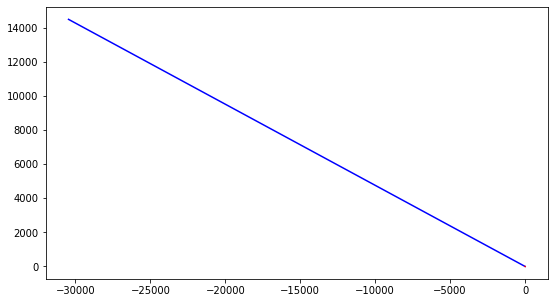

In [51]:
#exploration G6: Precession of Mercury 

import numpy as np
import matplotlib.pyplot as plt


def mainProg():
        # Define computational units: masses in solar masses, distances in AUs, time in Earth years
    G=4.0*np.pi**2
    
    solarMass = 2.0e30 #kg 
    
    #converting planrt masses into solar mass
    
    massMercury = 3.302e23/solarmass
    massVenus = 4.865e24/solarmass
    massEarth = 5.972e24/solarmass
    massMars = 6.42e23/solarmass
    massJupiter = 1.9e27/solarmass
    massSaturn = 5.68e26/solarmass
    massUranus = 8.68e25/solarmass
    massNeptune = 1.02e26/solarmass
    
   
    
    

    # System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
    N=2
    mass=np.array([1.00,massMercury])

    # Choose orbital period of 1.0 Earth year
    T=1.0
    w=2.0*np.pi/T

    # Kepler's 3rd Law to compute semi-major axis
    M=np.sum(mass)
    a=(G*M/w**2)**(1.0/3.0)

    # Initial positions: place two masses on x-axis with center-of-mass at origin
    # rows: different masses; columns: x, y, z coordinates
    
    position=np.zeros([N,3])
#    position[0,:]=np.array([-a*mass[1]/M,0,0])
#    position[1,:]=np.array([+a*mass[0]/M,0,0])

    au = 6.685e-9 

    xSun =-1.495101075039878E+05 * au
    ySun = 1.106259315594558E+06 * au
    zSun = 9.675398814459331E+02 * au
    #
    xMercury = 5.199877957334730e+07 * au
    yMercury = -2.370953967162964e+07 * au
    zMercury = -6.813237660072733e+06 * au
    #
    xJupiter = -4.131080193264723E+08 * au 
    yJupiter = -6.895063647582636E+08 * au
    zJupiter = 1.210749929284951E+07 * au
   
    position[0,:] = np.array([xSun,ySun,zSun])
    position[1,:] = np.array([xMercury,yMercury,zMercury])
   # position[2,:] = np.array([xJupiter,yJupiter,zJupiter])
    
    
    

    # Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
    # rows: different masses; columns: x, y, z components of velocity
    
    #part a#
    velocity=np.zeros([N,3])
    #velocity[0,:]=np.array([0,position[0,0],0])*w*1.25
    #velocity[1,:]=np.array([0,position[1,0],0])*w*1.25
    
    
    vxSun = -1.156533047710708E-02 * au
    vySun = 3.049105386033658E-03 * au
    vzSun = 2.923271646459486E-04 * au
    #
    vxMercury = 1.140282161172121E+01 * au
    vyMercury = 4.620741568620204E+01 * au
    vzMercury = 2.726559746465060E+00 * au
    #
    vxJupiter = 1.103985519413431E+01 * au
    vyJupiter = -6.102713598885527E+00 * au
    vzJupiter = -2.219424259481948E-01 * au
    
    velocity[0,:] = np.array([vxSun,vySun,vzSun])
    velocity[1,:] = np.array([vxMercury,vyMercury,vzMercury])
   # velocity[2,:] = np.array([vxJupiter,vyJupiter,vzJupiter])
    
    #end of part a#
    
    #part b#
    
    #end of part b#
    
  
    dthold = []
    num_steps = []
    
    # Step size and number of time steps
    tot_time=16.0
    for i in range(1,60,10):
        dt=(T/720.0) * i
        numsteps=np.ceil(tot_time/dt).astype(int)
        
        dthold.append(dt)
        num_steps.append(numsteps)
        
   
    
    #part a#
    
    #end of a#
    #part b#
   # positions2=np.zeros([N,3,num_steps+1])
    
    #end of b#
     

    
    pos = goingForward(G,N,position,mass,velocity,dthold[0],num_steps[0])
    
    fig = plt.figure(figsize=(9,5))
    plt.plot(pos[1,0,:],pos[1,1,:],'b-',pos[0,0,:],pos[0,1,:],'r-')
    plt.show()

#end of main program#

#start of defining our functions# 

def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            displacement = displacement/distance_cubed
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration


def goingForward(G,N,position,mass,velocity,dt,numsteps):
 #first step#

    positions=np.zeros([N,3,numsteps+1])
    positions[:,:,0]=position
    
    acceleration=G*accel_grav(mass,position)
    position_new=first_step(position,velocity,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,1]=position
    ##
    
   
    #making position arrays#
    for t in range(2,numsteps+1):
        acceleration=G*accel_grav(mass,position)
        position_new=verlet_step(position,position_old,acceleration,dt)
        position_old=position
        position=position_new
        positions[:,:,t]=position
        
    return positions

def goingBack(G,posin,mass,N,dt,numsteps):
     
    l = len(posin[0,0,:])-1
    
    posout=np.empty([N,3])

    posout[0,:] = np.array([posin[0,0,l],posin[0,1,l],0])
    posout[1,:] = np.array([posin[1,0,l],posin[1,1,l],0])
    
    
    velout = np.empty([N,3])
    
    velout[0,:] = -np.array([(1/dt)*(1.5*posin[0,0,l]-2*posin[0,0,l-1]+0.5*posin[0,0,l-2]),
                 (1/dt)*(1.5*posin[0,1,l]-2*posin[0,1,l-1]+0.5*posin[0,1,l-2]),0])

    velout[1,:] = -np.array([(1/dt)*(1.5*posin[1,0,l]-2*posin[1,0,l-1]+0.5*posin[1,0,l-2]),
                 (1/dt)*(1.5*posin[1,1,l]-2*posin[1,1,l-1]+0.5*posin[1,1,l-2]),0])
    
    posouts = np.empty([N,3,numsteps+1])
    posouts[:,:,0]=posout
    
    
    acceleration=G*accel_grav(mass,posout)
    position_new=first_step(posout,velout,acceleration,dt)
    position_old=posout
    posout=position_new
    posouts[:,:,1]=posout
    
    for t in range(2,numsteps+1):
        acceleration=G*accel_grav(mass,posout)
        position_new=verlet_step(posout,position_old,acceleration,dt)
        position_old=posout
        posout=position_new
        posouts[:,:,t]=posout
  
    return posouts


def pos2Vel(xpos,ypos,dt):
    
    l = len(xpos)
    
    velx = np.empty(l)
    vely = np.empty(l)
    
    for i in range(1,l-1):
        velx[i] = (xpos[i+1] - xpos[i-1])/(2.0*dt)
        vely[i] = (ypos[i+1] - ypos[i-1])/(2.0*dt)
        
    velx[0] = (1/dt)*( (-3/2)*xpos[0] + 2.0*xpos[1] - 0.5*xpos[2] ) 
    vely[0] = (1/dt)*( (-3/2)*ypos[0] + 2.0*ypos[1] - 0.5*ypos[2] )
    
    velx[l-1] = (1/dt)*( (3/2)*xpos[l-1] - 2.0*xpos[l-2] +0.5*xpos[l-3] )
    vely[l-1] = (1/dt)*( (3/2)*ypos[l-1] - 2.0*ypos[l-2] +0.5*ypos[l-3] )

    #return np.vstack((velx,vely))
    return np.array([velx,vely])

if __name__=='__main__':
    mainProg()

<IPython.core.display.Javascript object>


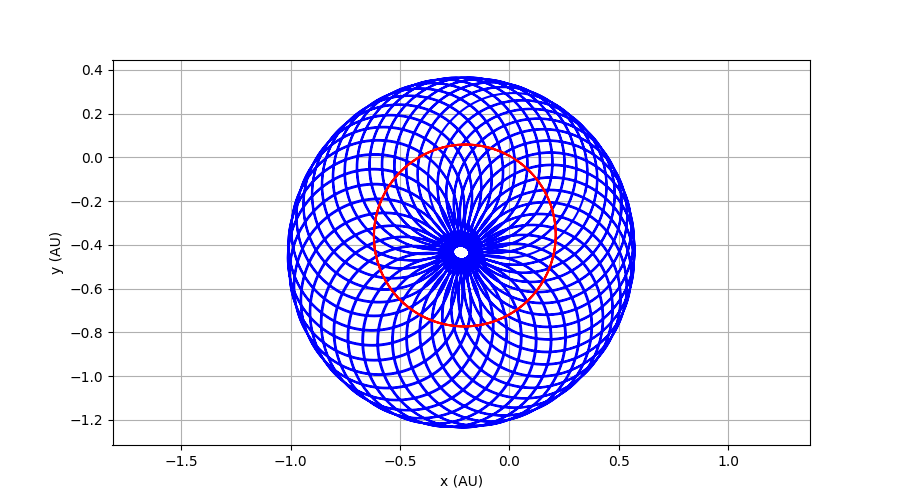

In [234]:
import numpy as np
import matplotlib.pyplot as plt

def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            distance_square = displacement[0]**2+displacement[1]**2+displacement[2]**2
            displacement = (displacement/distance_cubed) #* (1 + alpha/distance_square )
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

# Define computational units: masses in solar masses, distances in AUs, time in Earth years
G=4.0*np.pi**2

# System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
N=3

solarmass = 2.0e30 #kg 
    
#converting planet masses into solar mass
    
massMercury = 3.302e23/solarmass
massJupiter = 1.9e27/solarmass


mass=np.array([1.00,massMercury,100*massJupiter])


# Choose orbital period of 1.0 Earth year
T=88.0/365
w=2.0*np.pi/T

# Kepler's 3rd Law to compute semi-major axis
M=np.sum(mass)
a=(G*M/w**2)**(1.0/3.0)

# Initial positions: place two masses on x-axis with center-of-mass at origin
# rows: different masses; columns: x, y, z coordinates
position=np.zeros([N,3])
#position[0,:]=np.array([-a*mass[1]/M,0,0])
#position[1,:]=np.array([+a*mass[0]/M,0,0])

#au = 6.685e-9 
au = 1.496e+8

#






xMercury = (5.199877957334730e+07 / au) 
yMercury = (-2.370953967162964e+07 / au) 
zMercury = (-6.813237660072733e+06 / au) 
#
xJupiter = (-4.131080193264723E+08 / au) 
yJupiter = (-6.895063647582636E+08 / au) 
zJupiter = (1.210749929284951E+07 / au) 
   
    
xSun = (-1.495101075039878E+05 / au) 
ySun = (1.106259315594558E+06 / au) 
zSun = (9.675398814459331E+02 / au)


xcom = (1/np.sum(mass) ) * np.sum(mass*position[:,0]) 
ycom = (1/np.sum(mass) ) * np.sum(mass*position[:,1])
zcom = (1/np.sum(mass) ) * np.sum(mass*position[:,2])



position[0,:] = np.array([xSun,ySun,zSun])
position[1,:] = np.array([xMercury,yMercury,zMercury])
position[2,:] = np.array([xJupiter,yJupiter,zJupiter])


# Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
# rows: different masses; columns: x, y, z components of velocity
velocity=np.zeros([N,3])
#velocity[0,:]=np.array([0,position[0,0],0])*w*1.25
#velocity[1,:]=np.array([0,position[1,0],0])*w*1.25

#sec2year = 3.154e+7
sec2year = 3.171e-8


#
vxMercury = 1.140282161172121E+01 * (1/au) * (1/sec2year)
vyMercury = 4.620741568620204E+01 * (1/au) * (1/sec2year)
vzMercury = 2.726559746465060E+00 * (1/au) * (1/sec2year)
#
vxJupiter = 1.103985519413431E+01 * (1/au) * (1/sec2year)
vyJupiter = -6.102713598885527E+00 * (1/au) * (1/sec2year)
vzJupiter = -2.219424259481948E-01 * (1/au) * (1/sec2year)

vxSun = -1.156533047710708E-02 * (1/au) * (1/sec2year)
vySun = 3.049105386033658E-03 * (1/au) * (1/sec2year)
vzSun = 2.923271646459486E-04 * (1/au) * (1/sec2year)
    
velocity[0,:] = np.array([vxSun,vySun,vzSun])
velocity[1,:] = np.array([vxMercury,vyMercury,vzMercury])
velocity[2,:] = np.array([vxJupiter,vyJupiter,vzJupiter])

vxcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,0]) 
vycom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,1])
vzcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,2])

vcom = np.array([vxcom,vycom,vzcom])

velocity[0,:] = velocity[0,:] - vcom  
velocity[1,:] = velocity[1,:] - vcom
velocity[2,:] = velocity[2,:] - vcom


# Step size and number of time steps
dt=T/720.0
tot_time=20.0
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position

# First time step
acceleration=G*accel_grav(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position

# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    acceleration=G*accel_grav(mass,position)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position

    
fig = plt.figure(figsize=(9,5))
plt.plot(positions[1,0,:],positions[1,1,:],'b-',positions[0,0,:],positions[0,1,:],'r-')#,positions[2,0,:],positions[2,1,:],'k-')
plt.axis('equal');
plt.xlabel('x (AU)');
plt.ylabel('y (AU)');

plt.grid()

<IPython.core.display.Javascript object>


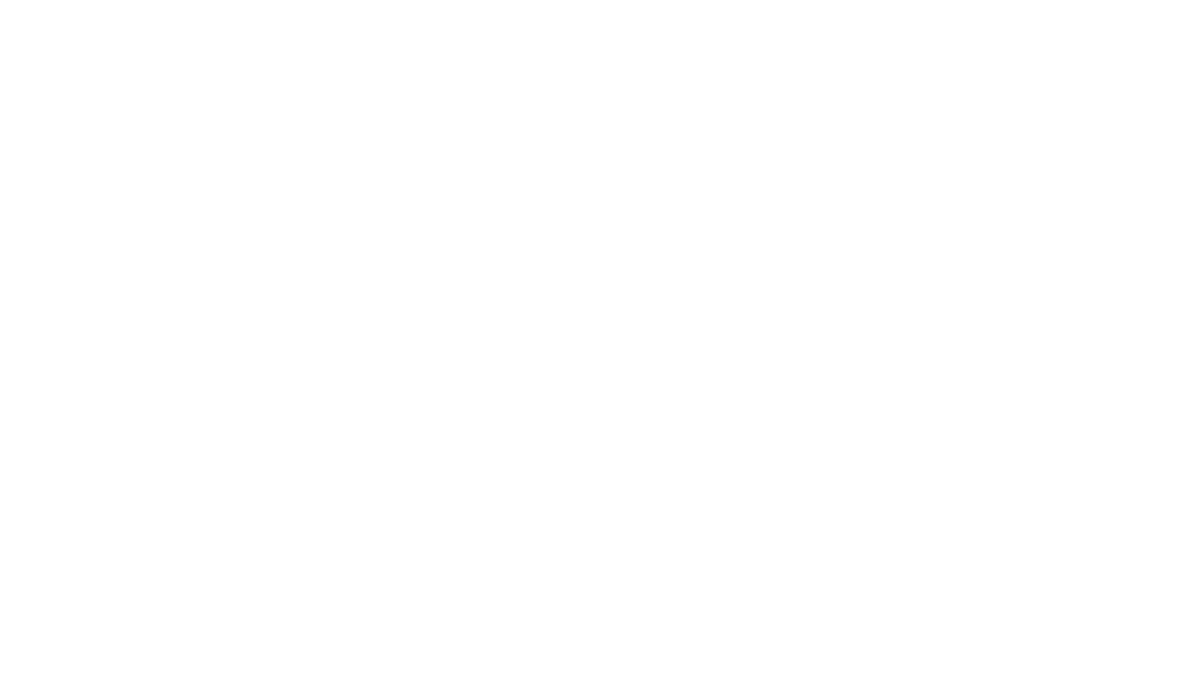

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def mainProg():
    
    alpha = [0,7.5e-7,7.5e-6,7.5e-5,7.5e-4,7.5e-3]
    
    posfor1 = subGrav(alpha[0])
    posfor2 = subGrav(alpha[1])
    posfor3 = subGrav(alpha[2])
    posfor4 = subGrav(alpha[3])
    posfor5 = subGrav(alpha[4])
    posfor6 = subGrav(alpha[5])
    
    
    fig,axes = plt.subplots(2,3,figsize=(12,7) )#,sharex = True,sharey = True)

    axes[0,0].plot(posfor1[1,0,:],posfor1[1,1,:],'b-',posfor1[0,0,:],posfor1[0,1,:],'r-')
    axes[0,0].set_title(r'$\alpha$ = 0'  ) 

    
    axes[0,1].plot(posfor2[1,0,:],posfor2[1,1,:],'b-',posfor2[0,0,:],posfor2[0,1,:],'r-')
    axes[0,1].set_title(r'$\alpha$ = 7.5e-7'  )
    
    axes[0,2].plot(posfor3[1,0,:],posfor3[1,1,:],'b-',posfor3[0,0,:],posfor3[0,1,:],'r-')
    axes[0,2].set_title(r'$\alpha$ = 7.5e-6'  )

    axes[1,0].plot(posfor4[1,0,:],posfor4[1,1,:],'b-',posfor4[0,0,:],posfor4[0,1,:],'r-')
    axes[1,0].set_title(r'$\alpha$ = 7.5e-5'  )
    
    
    axes[1,1].plot(posfor5[1,0,:],posfor5[1,1,:],'b-',posfor5[0,0,:],posfor5[0,1,:],'r-')
    axes[1,1].set_title(r'$\alpha$ = 7.5e-4'  )
    
    
    axes[1,2].plot(posfor6[1,0,:],posfor6[1,1,:],'b-',posfor6[0,0,:],posfor6[0,1,:],'r-')
    axes[1,2].set_title(r'$\alpha$ = 7.5e-3'  )
    
    fig.tight_layout()
    
    for ax in axes.flat:
        #ax.set(xlabel='t (weeks)', ylabel='population')
        ax.grid(True)
        
    plt.setp(axes[-1, :], xlabel='x (AU)')
    plt.setp(axes[:, 0], ylabel='y (AU)')
    
    fig.savefig('precessioMercury5Jupiters.pdf',bbox_inches='tight')

def subGrav(alpha):

    # Define computational units: masses in solar masses, distances in AUs, time in Earth years
    G=4.0*np.pi**2

    # System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
    N=3

    solarmass = 2.0e30 #kg 

    #converting planet masses into solar mass

    massMercury = 3.302e23/solarmass
    massJupiter = 1.9e27/solarmass


    mass=np.array([1.00,massMercury,5*massJupiter])


    # Choose orbital period of 1.0 Earth year
    T=88.0/365
    w=2.0*np.pi/T


    def accel_grav(alpha,mass, position):
        N = mass.shape[0]
        accel_grav = np.zeros([N,3])
        for i in range(N-1):
            for j in range(i+1,N):
                displacement = position[j,:]-position[i,:]
                distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
                distance_square = displacement[0]**2+displacement[1]**2+displacement[2]**2
                displacement = (displacement/distance_cubed) * (1 + alpha/distance_square )
                accel_grav[i,:] += mass[j]*displacement
                accel_grav[j,:] -= mass[i]*displacement
        return accel_grav

    def first_step(position,velocity,acceleration,dt):
        return position+dt*velocity+0.5*(dt**2)*acceleration

    def verlet_step(position,position_old,acceleration,dt):
        return 2.0*position-position_old+(dt**2)*acceleration




    # Kepler's 3rd Law to compute semi-major axis
    M=np.sum(mass)
    a=(G*M/w**2)**(1.0/3.0)

    # Initial positions: place two masses on x-axis with center-of-mass at origin
    # rows: different masses; columns: x, y, z coordinates
    position=np.zeros([N,3])
    #position[0,:]=np.array([-a*mass[1]/M,0,0])
    #position[1,:]=np.array([+a*mass[0]/M,0,0])

    au = 1.496e+8

    #


    xMercury = (5.199877957334730e+07 / au) 
    yMercury = (-2.370953967162964e+07 / au) 
    zMercury = (-6.813237660072733e+06 / au) 
    #
    xJupiter = (-4.131080193264723E+08 / au) 
    yJupiter = (-6.895063647582636E+08 / au) 
    zJupiter = (1.210749929284951E+07 / au) 


    xSun = (-1.495101075039878E+05 / au) 
    ySun = (1.106259315594558E+06 / au) 
    zSun = (9.675398814459331E+02 / au)


    xcom = (1/np.sum(mass) ) * np.sum(mass*position[:,0]) 
    ycom = (1/np.sum(mass) ) * np.sum(mass*position[:,1])
    zcom = (1/np.sum(mass) ) * np.sum(mass*position[:,2])



    position[0,:] = np.array([xSun,ySun,zSun])
    position[1,:] = np.array([xMercury,yMercury,zMercury])
    position[2,:] = np.array([xJupiter,yJupiter,zJupiter])



    velocity=np.zeros([N,3])
    sec2year = 3.171e-8


    #
    vxMercury = 1.140282161172121E+01 * (1/au) * (1/sec2year)
    vyMercury = 4.620741568620204E+01 * (1/au) * (1/sec2year)
    vzMercury = 2.726559746465060E+00 * (1/au) * (1/sec2year)
    #
    vxJupiter = 1.103985519413431E+01 * (1/au) * (1/sec2year)
    vyJupiter = -6.102713598885527E+00 * (1/au) * (1/sec2year)
    vzJupiter = -2.219424259481948E-01 * (1/au) * (1/sec2year)

    vxSun = -1.156533047710708E-02 * (1/au) * (1/sec2year)
    vySun = 3.049105386033658E-03 * (1/au) * (1/sec2year)
    vzSun = 2.923271646459486E-04 * (1/au) * (1/sec2year)

    velocity[0,:] = np.array([vxSun,vySun,vzSun])
    velocity[1,:] = np.array([vxMercury,vyMercury,vzMercury])
    velocity[2,:] = np.array([vxJupiter,vyJupiter,vzJupiter])

    vxcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,0]) 
    vycom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,1])
    vzcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,2])

    vcom = np.array([vxcom,vycom,vzcom])

    velocity[0,:] = velocity[0,:] - vcom  
    velocity[1,:] = velocity[1,:] - vcom
    velocity[2,:] = velocity[2,:] - vcom


    # Step size and number of time steps
    dt=T/720.0
    tot_time=12.0
    num_steps=np.ceil(tot_time/dt).astype(int)
    positions=np.zeros([N,3,num_steps+1])
    positions[:,:,0]=position
    # First time step
    acceleration=G*accel_grav(alpha,mass,position)
    position_new=first_step(position,velocity,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,1]=position

    # Loop through time steps 2 through num_steps
    for t in range(2,num_steps+1):
        acceleration=G*accel_grav(alpha,mass,position)
        position_new=verlet_step(position,position_old,acceleration,dt)
        position_old=position
        position=position_new
        positions[:,:,t]=position

    return positions

if __name__=='__main__':
    mainProg()
    


In [25]:
import numpy as np
import matplotlib.pyplot as plt


def mainProg():
    
    alpha = [0,7.5e-7,7.5e-6,7.5e-5,7.5e-4,7.5e-3]
    
    posfor1 = subGrav(alpha[0])
    posfor2 = subGrav(alpha[1])
    posfor3 = subGrav(alpha[2])
    posfor4 = subGrav(alpha[3])
    posfor5 = subGrav(alpha[4])
    posfor6 = subGrav(alpha[5])
    
    
    fig,axes = plt.subplots(2,3,figsize=(12,7) )#,sharex = True,sharey = True)

    axes[0,0].plot(posfor1[1,0,:],posfor1[1,1,:],'b-',posfor1[0,0,:],posfor1[0,1,:],'r-')
    axes[0,0].set_title(r'$\alpha$ = 0'  ) 

    
    axes[0,1].plot(posfor2[1,0,:],posfor2[1,1,:],'b-',posfor2[0,0,:],posfor2[0,1,:],'r-')
    axes[0,1].set_title(r'$\alpha$ = 7.5e-7'  )
    
    axes[0,2].plot(posfor3[1,0,:],posfor3[1,1,:],'b-',posfor3[0,0,:],posfor3[0,1,:],'r-')
    axes[0,2].set_title(r'$\alpha$ = 7.5e-6'  )

    axes[1,0].plot(posfor4[1,0,:],posfor4[1,1,:],'b-',posfor4[0,0,:],posfor4[0,1,:],'r-')
    axes[1,0].set_title(r'$\alpha$ = 7.5e-5'  )
    
    
    axes[1,1].plot(posfor5[1,0,:],posfor5[1,1,:],'b-',posfor5[0,0,:],posfor5[0,1,:],'r-')
    axes[1,1].set_title(r'$\alpha$ = 7.5e-4'  )
    
    
    axes[1,2].plot(posfor6[1,0,:],posfor6[1,1,:],'b-',posfor6[0,0,:],posfor6[0,1,:],'r-')
    axes[1,2].set_title(r'$\alpha$ = 7.5e-3'  )
    
    fig.tight_layout()
    
    for ax in axes.flat:
        #ax.set(xlabel='t (weeks)', ylabel='population')
        ax.grid(True)
        
    plt.setp(axes[-1, :], xlabel='x (AU)')
    plt.setp(axes[:, 0], ylabel='y (AU)')
    
    fig.savefig('precessionMercury100Jupiters.pdf',bbox_inches='tight')

def subGrav(alpha):

    # Define computational units: masses in solar masses, distances in AUs, time in Earth years
    G=4.0*np.pi**2

    # System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
    N=3

    solarmass = 2.0e30 #kg 

    #converting planet masses into solar mass

    massMercury = 3.302e23/solarmass
    massJupiter = 1.9e27/solarmass


    mass=np.array([1.00,massMercury,100*massJupiter])


    # Choose orbital period of 1.0 Earth year
    T=88.0/365
    w=2.0*np.pi/T


    def accel_grav(alpha,mass, position):
        N = mass.shape[0]
        accel_grav = np.zeros([N,3])
        for i in range(N-1):
            for j in range(i+1,N):
                displacement = position[j,:]-position[i,:]
                distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
                distance_square = displacement[0]**2+displacement[1]**2+displacement[2]**2
                displacement = (displacement/distance_cubed) * (1 + alpha/distance_square )
                accel_grav[i,:] += mass[j]*displacement
                accel_grav[j,:] -= mass[i]*displacement
        return accel_grav

    def first_step(position,velocity,acceleration,dt):
        return position+dt*velocity+0.5*(dt**2)*acceleration

    def verlet_step(position,position_old,acceleration,dt):
        return 2.0*position-position_old+(dt**2)*acceleration




    # Kepler's 3rd Law to compute semi-major axis
    M=np.sum(mass)
    a=(G*M/w**2)**(1.0/3.0)

    # Initial positions: place two masses on x-axis with center-of-mass at origin
    # rows: different masses; columns: x, y, z coordinates
    position=np.zeros([N,3])
    #position[0,:]=np.array([-a*mass[1]/M,0,0])
    #position[1,:]=np.array([+a*mass[0]/M,0,0])

    au = 1.496e+8

    #


    xMercury = (5.199877957334730e+07 / au) 
    yMercury = (-2.370953967162964e+07 / au) 
    zMercury = (-6.813237660072733e+06 / au) 
    #
    xJupiter = (-4.131080193264723E+08 / au) 
    yJupiter = (-6.895063647582636E+08 / au) 
    zJupiter = (1.210749929284951E+07 / au) 


    xSun = (-1.495101075039878E+05 / au) 
    ySun = (1.106259315594558E+06 / au) 
    zSun = (9.675398814459331E+02 / au)


    xcom = (1/np.sum(mass) ) * np.sum(mass*position[:,0]) 
    ycom = (1/np.sum(mass) ) * np.sum(mass*position[:,1])
    zcom = (1/np.sum(mass) ) * np.sum(mass*position[:,2])



    position[0,:] = np.array([xSun,ySun,zSun])
    position[1,:] = np.array([xMercury,yMercury,zMercury])
    position[2,:] = np.array([xJupiter,yJupiter,zJupiter])



    velocity=np.zeros([N,3])
    sec2year = 3.171e-8


    #
    vxMercury = 1.140282161172121E+01 * (1/au) * (1/sec2year)
    vyMercury = 4.620741568620204E+01 * (1/au) * (1/sec2year)
    vzMercury = 2.726559746465060E+00 * (1/au) * (1/sec2year)
    #
    vxJupiter = 1.103985519413431E+01 * (1/au) * (1/sec2year)
    vyJupiter = -6.102713598885527E+00 * (1/au) * (1/sec2year)
    vzJupiter = -2.219424259481948E-01 * (1/au) * (1/sec2year)

    vxSun = -1.156533047710708E-02 * (1/au) * (1/sec2year)
    vySun = 3.049105386033658E-03 * (1/au) * (1/sec2year)
    vzSun = 2.923271646459486E-04 * (1/au) * (1/sec2year)

    velocity[0,:] = np.array([vxSun,vySun,vzSun])
    velocity[1,:] = np.array([vxMercury,vyMercury,vzMercury])
    velocity[2,:] = np.array([vxJupiter,vyJupiter,vzJupiter])

    vxcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,0]) 
    vycom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,1])
    vzcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,2])

    vcom = np.array([vxcom,vycom,vzcom])

    velocity[0,:] = velocity[0,:] - vcom  
    velocity[1,:] = velocity[1,:] - vcom
    velocity[2,:] = velocity[2,:] - vcom


    # Step size and number of time steps
    dt=T/720.0
    tot_time=12.0
    num_steps=np.ceil(tot_time/dt).astype(int)
    positions=np.zeros([N,3,num_steps+1])
    positions[:,:,0]=position
    # First time step
    acceleration=G*accel_grav(alpha,mass,position)
    position_new=first_step(position,velocity,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,1]=position

    # Loop through time steps 2 through num_steps
    for t in range(2,num_steps+1):
        acceleration=G*accel_grav(alpha,mass,position)
        position_new=verlet_step(position,position_old,acceleration,dt)
        position_old=position
        position=position_new
        positions[:,:,t]=position

    return positions

if __name__=='__main__':
    mainProg()
    


SyntaxError: positional argument follows keyword argument (<ipython-input-25-757ca4398da2>, line 19)

<IPython.core.display.Javascript object>


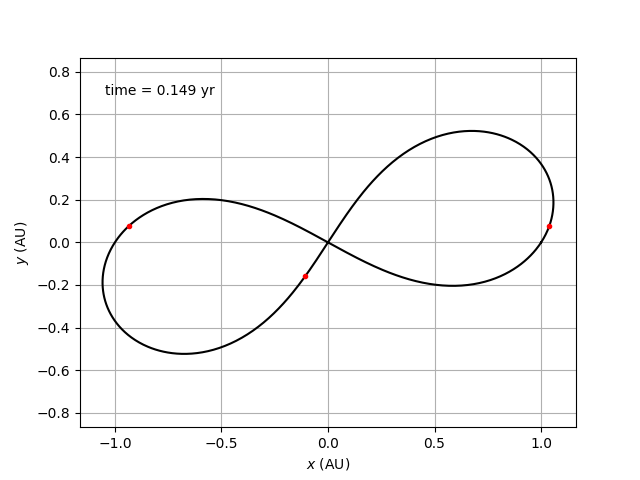

MovieWriter imagemagick unavailable; using Pillow instead.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation



def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            distance_square = displacement[0]**2+displacement[1]**2+displacement[2]**2
            displacement = (displacement/distance_cubed) #* (1 + alpha/distance_square )
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

# Define computational units: masses in solar masses, distances in AUs, time in Earth years
G=1

# System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
N=3

solarMass = 2.0e30 #kg 
    
#converting planet masses into solar mass
    



mass=np.array([1.00,1.00,1.00])


# Choose orbital period of 1.0 Earth year
T=6.324449
w=2.0*np.pi/T

# Kepler's 3rd Law to compute semi-major axis
M=np.sum(mass)
a=(G*M/w**2)**(1.0/3.0)

# Initial positions: place two masses on x-axis with center-of-mass at origin
# rows: different masses; columns: x, y, z coordinates
position=np.zeros([N,3])
#position[0,:]=np.array([-a*mass[1]/M,0,0])
#position[1,:]=np.array([+a*mass[0]/M,0,0])



position[0,:] = np.array([-1,0,0])
position[1,:] = np.array([1,0,0])
position[2,:] = np.array([0,0,0])


# Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
# rows: different masses; columns: x, y, z components of velocity
velocity=np.zeros([N,3])

velocity[0,:] = np.array([0.347111,0.532728,0])
velocity[1,:] = np.array([0.347111,0.532728,0])
velocity[2,:] = np.array([-2*0.347111,-2*0.532728,0])


vxcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,0]) 
vycom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,1])
vzcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,2])

vcom = np.array([vxcom,vycom,vzcom])

velocity[0,:] = velocity[0,:] - vcom  
velocity[1,:] = velocity[1,:] - vcom
velocity[2,:] = velocity[2,:] - vcom

# Step size and number of time steps
dt=T/(720.0)
tot_time=6.324449
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position

# First time step
acceleration=G*accel_grav(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position

# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    acceleration=G*accel_grav(mass,position)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position

    
t = np.linspace(0.0, tot_time, num_steps+1) #convert to picoseconds


%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.0,+2.0), ylim=(-2.0,+2.0))
ax.grid()
plt.axis('equal'); #comment this out?
plt.xlabel('$x$ (AU)');
plt.ylabel('$y$ (AU)');

plt.plot(positions[1,0,:],positions[1,1,:],'k-')

line, = ax.plot([], [], 'or', markersize=3,lw=2)
time_template = 'time = %.3f yr'
time_text = ax.text(0.05, 0.90, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [positions[:,0,i]]
    thisy = [positions[:,1,i]]
   

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % t[i])
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=8, blit=True, init_func=init)

ani.save('figureEightOrbit.gif', writer='imagemagick',fps=30)


plt.show()

<IPython.core.display.Javascript object>


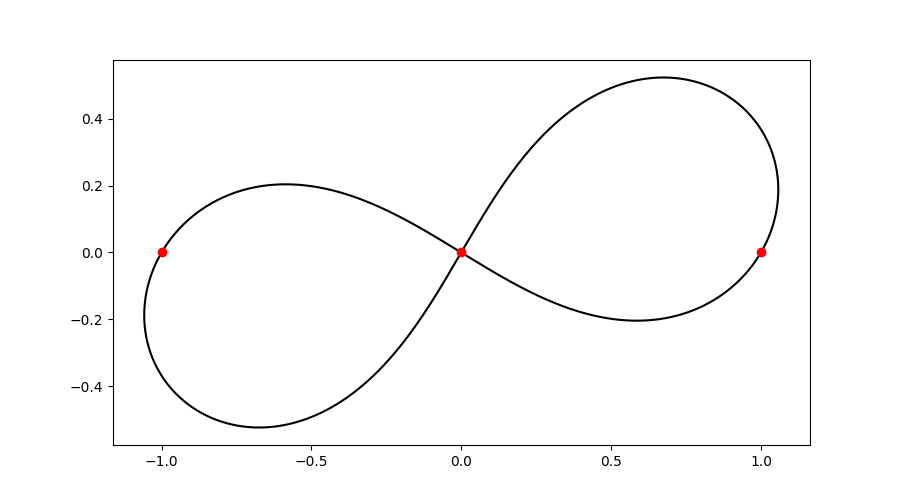

In [17]:
fig = plt.figure(figsize=(9,5))

plt.plot(positions[1,0,:],positions[1,1,:],'k-')
plt.plot(positions[1,0,0],positions[1,1,0],'or')
plt.plot(positions[0,0,0],positions[0,1,0],'or')
plt.plot(positions[2,0,0],positions[2,1,0],'or')



plt.show()



<IPython.core.display.Javascript object>


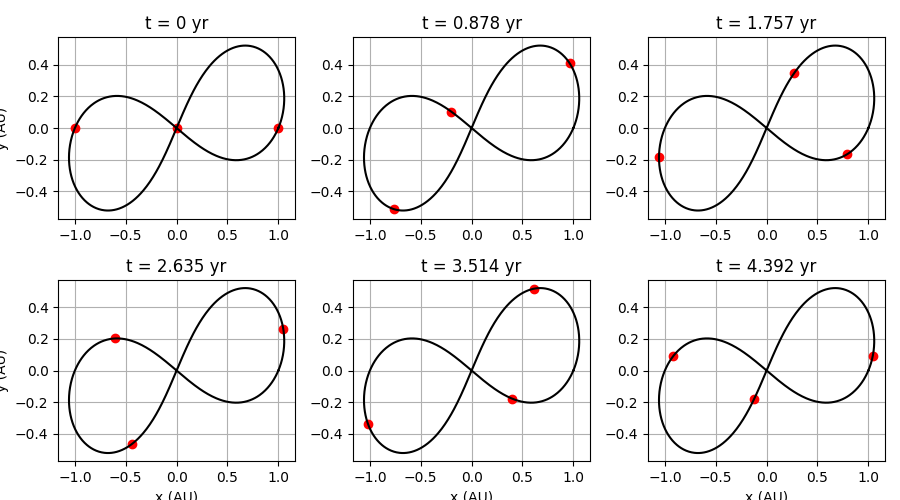

In [24]:
fig,axes = plt.subplots(2,3,figsize=(9,5) )#,sharex = True,sharey = True)


axes[0,0].plot(positions[0,0,0],positions[0,1,0],'or')
axes[0,0].plot(positions[1,0,0],positions[1,1,0],'or')
axes[0,0].plot(positions[2,0,0],positions[2,1,0],'or')
axes[0,0].plot(positions[1,0,:],positions[1,1,:],'k-')


axes[0,0].set_title('t = 0 yr')
    
axes[0,1].plot(positions[0,0,100],positions[0,1,100],'or')
axes[0,1].plot(positions[1,0,100],positions[1,1,100],'or')
axes[0,1].plot(positions[2,0,100],positions[2,1,100],'or')
axes[0,1].plot(positions[1,0,:],positions[1,1,:],'k-')

axes[0,1].set_title('t = ' + "{:.3f}".format(t[100])+' yr')
    
axes[0,2].plot(positions[0,0,200],positions[0,1,200],'or')
axes[0,2].plot(positions[1,0,200],positions[1,1,200],'or')
axes[0,2].plot(positions[2,0,200],positions[2,1,200],'or')
axes[0,2].plot(positions[1,0,:],positions[1,1,:],'k-')
axes[0,2].set_title('t = ' + "{:.3f}".format(t[200])+' yr')

axes[1,0].plot(positions[0,0,300],positions[0,1,300],'or')
axes[1,0].plot(positions[1,0,300],positions[1,1,300],'or')
axes[1,0].plot(positions[2,0,300],positions[2,1,300],'or')
axes[1,0].plot(positions[1,0,:],positions[1,1,:],'k-')
axes[1,0].set_title('t = ' + "{:.3f}".format(t[300])+' yr')
    
    
axes[1,1].plot(positions[0,0,400],positions[0,1,400],'or')
axes[1,1].plot(positions[1,0,400],positions[1,1,400],'or')
axes[1,1].plot(positions[2,0,400],positions[2,1,400],'or')
axes[1,1].plot(positions[1,0,:],positions[1,1,:],'k-')
axes[1,1].set_title('t = ' + "{:.3f}".format(t[400])+' yr')
    
    
axes[1,2].plot(positions[0,0,500],positions[0,1,500],'or')
axes[1,2].plot(positions[1,0,500],positions[1,1,500],'or')
axes[1,2].plot(positions[2,0,500],positions[2,1,500],'or')
axes[1,2].plot(positions[1,0,:],positions[1,1,:],'k-')
axes[1,2].set_title('t = ' + "{:.3f}".format(t[500])+' yr')

fig.tight_layout()
    
for ax in axes.flat:
        #ax.set(xlabel='t (weeks)', ylabel='population')
    ax.grid(True)
        
plt.setp(axes[-1, :], xlabel='x (AU)')
plt.setp(axes[:, 0], ylabel='y (AU)')       
plt.show()

fig.savefig('3bodystableorbit.pdf',bbox_inches='tight')


<IPython.core.display.Javascript object>


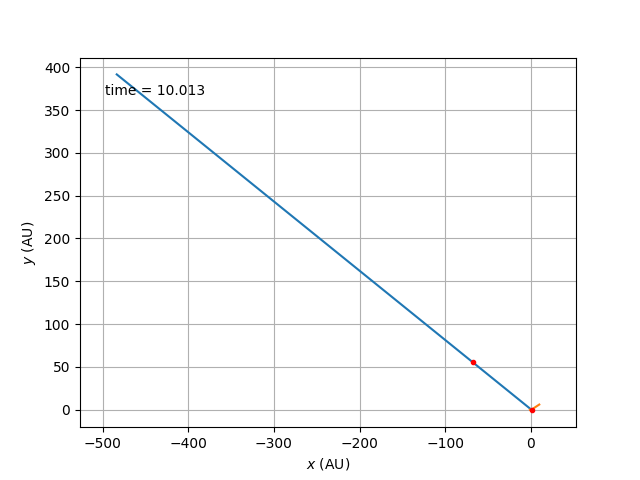

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            distance_square = displacement[0]**2+displacement[1]**2+displacement[2]**2
            displacement = (displacement/distance_cubed) #* (1 + alpha/distance_square )
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration

# Define computational units: masses in solar masses, distances in AUs, time in Earth years
G=1

# System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
N=3

solarMass = 2.0e30 #kg 
    
#converting planet masses into solar mass
    



mass=np.array([1.00,1.00,1.00])


# Choose orbital period of 1.0 Earth year
T=54.207599
w=2.0*np.pi/T

# Kepler's 3rd Law to compute semi-major axis
M=np.sum(mass)
a=(G*M/w**2)**(1.0/3.0)

# Initial positions: place two masses on x-axis with center-of-mass at origin
# rows: different masses; columns: x, y, z coordinates
position=np.zeros([N,3])
#position[0,:]=np.array([-a*mass[1]/M,0,0])
#position[1,:]=np.array([+a*mass[0]/M,0,0])



position[0,:] = np.array([-1,0,0])
position[1,:] = np.array([1,0,0])
position[2,:] = np.array([0,0,0])


# Initial velocities: Circular orbits - with initial positions on x-axis, initial velocities in y-direction
# rows: different masses; columns: x, y, z components of velocity
velocity=np.zeros([N,3])
p1 = 0.417343
p2 = 0.313100

velocity[0,:] = np.array([p1,p2,0])
velocity[1,:] = np.array([p1,p2,0])
velocity[2,:] = np.array([-2*p1,-2*p2,0])


vxcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,0]) 
vycom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,1])
vzcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,2])

vcom = np.array([vxcom,vycom,vzcom])

velocity[0,:] = velocity[0,:] - vcom  
velocity[1,:] = velocity[1,:] - vcom
velocity[2,:] = velocity[2,:] - vcom

# Step size and number of time steps
dt=T/(720.0)
tot_time=60
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position

# First time step
acceleration=G*accel_grav(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position

# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    acceleration=G*accel_grav(mass,position)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position

    
t = np.linspace(0.0, tot_time, num_steps+1) #convert to picoseconds


%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.0,+2.0), ylim=(-2.0,+2.0))
ax.grid()
plt.axis('equal'); #comment this out?
plt.xlabel('$x$ (AU)');
plt.ylabel('$y$ (AU)');

plt.plot(positions[1,0,:],positions[1,1,:],positions[0,0,:],positions[0,1,:])

line, = ax.plot([], [], 'or', markersize=3,lw=2)
time_template = 'time = %.3f '
time_text = ax.text(0.05, 0.90, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [positions[:,0,i]]
    thisy = [positions[:,1,i]]
   

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % t[i])
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=8, blit=True, init_func=init)

plt.show()


<IPython.core.display.Javascript object>


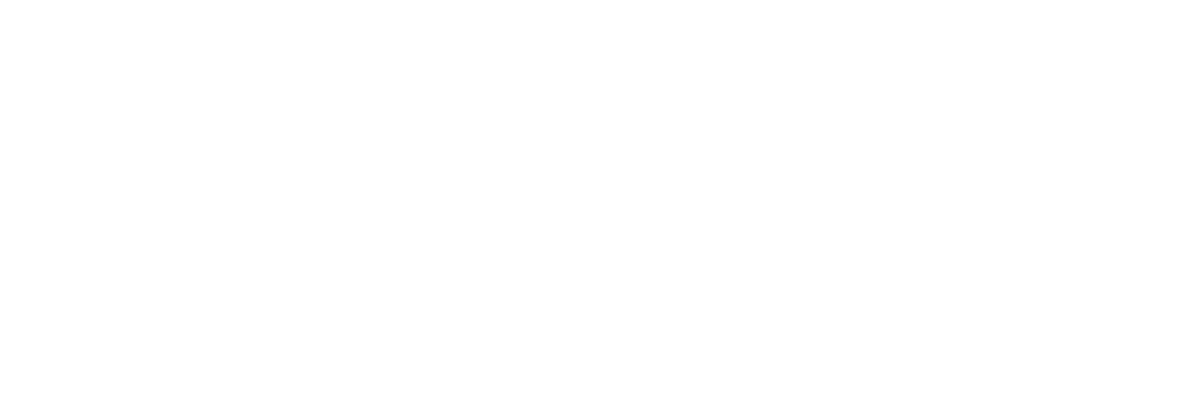

In [23]:
#1c simulating the Solar System and some moons
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


def mainProg():
    
    T = 1.0 #earth year
    solarmass = 2.0e30 #kg 
    massMercury = 3.302e23/solarmass
    massJupiter = 1.9e27/solarmass
    massVenus = 4.8685e23/solarmass
    massEarth = 5.972e24/solarmass
    massMars = 6.417e23/solarmass
    massSaturn = 5.683e26/solarmass
    massUranus = 86.813e24/solarmass 
    massNeptune = 102.409e24/solarmass 
    
    massMoon =  7.349e22/solarmass
    massIO = 8.931e22/solarmass
    massEuropa = 4.7981e+22/solarmass
    massGanymede = 1.481e+23/solarmass
    massCallisto = 1.075e+23/solarmass
    massMimas = 3.75e19/solarmass 
    massAriel = 13.53e20/solarmass
    massTriton = 2.129e+22/solarmass
    
    massPluto = 0.0074e-6
    
    
    


    mass=np.array([1.00,massMercury,massVenus,massEarth,massMars,massJupiter,massSaturn,massUranus,massNeptune,
                  massMoon,massIO,massEuropa,massGanymede,massCallisto,massMimas,massAriel,massTriton,massPluto])
    
    pos = subGrav(T,mass)
    
    
    #np.save('SolarSystem.npy',positions)
    fig = plt.figure(figsize=(12,4))
    plt.plot(pos[0,0,:],pos[0,1,:],label='Sun',color='gold')
    plt.plot(pos[1,0,:],pos[1,1,:],label='Mercury',color='maroon')
    plt.plot(pos[2,0,:],pos[2,1,:],label='Venus',color='brown')
    plt.plot(pos[3,0,:],pos[3,1,:],label='Earth',color='blue')
    plt.plot(pos[4,0,:],pos[4,1,:],label='Mars',color='red')
    plt.plot(pos[5,0,:],pos[5,1,:],label='Jupiter',color='orange')
    plt.plot(pos[6,0,:],pos[6,1,:],label='Saturn',color='peru')
    plt.plot(pos[7,0,:],pos[7,1,:],label='Uranus',color='darkblue')
    plt.plot(pos[8,0,:],pos[8,1,:],label='Neptune',color='royalblue')
    plt.plot(pos[9,0,:],pos[9,1,:],label='Moon',color='darkgray')
    plt.plot(pos[10,0,:],pos[10,1,:],label='IO',color='plum')
    plt.plot(pos[11,0,:],pos[11,1,:],label='Europa',color='purple')
    plt.plot(pos[12,0,:],pos[12,1,:],label='Ganymede',color='hotpink')
    plt.plot(pos[13,0,:],pos[13,1,:],label='Callisto',color='pink')
    plt.plot(pos[14,0,:],pos[14,1,:],label='Mimas',color='mediumaquamarine')
    plt.plot(pos[15,0,:],pos[15,1,:],label='Ariel',color='paleturquoise')
    plt.plot(pos[16,0,:],pos[16,1,:],label='Triton',color='turquoise')
    plt.plot(pos[17,0,:],pos[17,1,:],label='Pluto',color='cyan')
    
    
    plt.plot(0,0,'X',color='black',label='Barycenter')
    

    
    plt.axis('equal');
    plt.xlabel('x (AU)');
    plt.ylabel('y (AU)');
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    fig.savefig('solarsystem.pdf',bbox_inches='tight')
    

def subGrav(T,mass):

    # Define computational units: masses in solar masses, distances in AUs, time in Earth years
    G=4.0*np.pi**2

    # System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
    N=18

   


    # Choose orbital period of 1.0 Earth year
    #T=1.0
    w=2.0*np.pi/T


    def accel_grav(mass, position):
        N = mass.shape[0]
        accel_grav = np.zeros([N,3])
        for i in range(N-1):
            for j in range(i+1,N):
                displacement = position[j,:]-position[i,:]
                distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
                displacement = (displacement/distance_cubed) 
                accel_grav[i,:] += mass[j]*displacement
                accel_grav[j,:] -= mass[i]*displacement
        return accel_grav

    def first_step(position,velocity,acceleration,dt):
        return position+dt*velocity+0.5*(dt**2)*acceleration

    def verlet_step(position,position_old,acceleration,dt):
        return 2.0*position-position_old+(dt**2)*acceleration




    # Kepler's 3rd Law to compute semi-major axis
    M=np.sum(mass)
    a=(G*M/w**2)**(1.0/3.0)

    # Initial positions: place two masses on x-axis with center-of-mass at origin
    # rows: different masses; columns: x, y, z coordinates
    position=np.zeros([N,3])
    #position[0,:]=np.array([-a*mass[1]/M,0,0])
    #position[1,:]=np.array([+a*mass[0]/M,0,0])

    au = 1.496e+8

    #


    xMercury = (5.199877957334730e+07 / au) 
    yMercury = (-2.370953967162964e+07 / au) 
    zMercury = (-6.813237660072733e+06 / au) 
    #
    xJupiter = (-4.131080193264723E+08 / au) 
    yJupiter = (-6.895063647582636E+08 / au) 
    zJupiter = (1.210749929284951E+07 / au) 
    #
    xSun = (-1.495101075039878E+05 / au) 
    ySun = (1.106259315594558E+06 / au) 
    zSun = (9.675398814459331E+02 / au)


    xcom = (1/np.sum(mass) ) * np.sum(mass*position[:,0]) 
    ycom = (1/np.sum(mass) ) * np.sum(mass*position[:,1])
    zcom = (1/np.sum(mass) ) * np.sum(mass*position[:,2])

    xVenus = -8.679153883298413E+07 /au
    yVenus = 6.446138759949318E+07 /au
    zVenus = 5.867672579719771E+06 /au
    
    xEarth = -3.886522150006551E+07 /au 
    yEarth = 1.430206745912296E+08  / au
    zEarth = 1.883196715973318E+03 / au
    
    xMars =-1.464697478294306E+08 /au
    yMars = 1.986253294547337E+08 /au
    zMars = 7.736544248200640E+06 /au
    
    xSaturn = 1.385152256381352E+09 /au
    ySaturn =-4.181239662065806E+08 /au
    zSaturn =-4.778240353674421E+07 /au
    
    xUranus = 1.307827229217906E+09 /au 
    yUranus =-2.638351931152593E+09 /au
    zUranus =-2.674667096438980E+07 /au
    
    xNeptune = 1.768870245721755E+09 /au
    yNeptune =-4.151457060187383E+09 /au
    zNeptune = 4.472505985723901E+07 /au
    
    xMoon =-3.849481043543395E+07 /au
    yMoon = 1.429186441382921E+08 /au
    zMoon = 3.089393370564282E+04 /au
    
    xIO =-4.135123962596191E+08 /au
    yIO =-6.893812302566739E+08 /au
    zIO = 1.210612222206393E+07 /au

    xEuropa =-4.134474658862829E+08 /au 
    yEuropa =-6.900864560296533E+08 /au
    zEuropa = 1.208176224101704E+07 /au
    
    xGanymede =-4.120454129491895E+08 /au
    yGanymede =-6.893814621589197E+08 /au
    zGanymede = 1.212330431229168E+07 /au

    xCallisto =-4.114560579357040E+08 /au 
    yCallisto =-6.886272615580981E+08 /au
    zCallisto = 1.215814327315736E+07 /au

    xMimas = 1.385278367609140E+09 /au
    yMimas =-4.180022181545605E+08 /au
    zMimas =-4.785258275632173E+07 /au
    
    xAriel = 1.307721887334984E+09 /au
    yAriel =-2.638350967007255E+09 /au
    zAriel =-2.690575545245838E+07 /au
    
    xTriton = 1.768757237895620E+09 /au
    yTriton =-4.151255455001078E+09 /au
    zTriton = 4.499398529338384E+07 /au
    
    xPluto =-2.273512059546033E+09 /au 
    yPluto =-3.689077451814580E+09/au 
    zPluto = 1.052383296702657E+09 /au
    
   
    

    position[0,:] = np.array([xSun,ySun,zSun])
    position[1,:] = np.array([xMercury,yMercury,zMercury])
    position[2,:] = np.array([xVenus,yVenus,zVenus])
    position[3,:] = np.array([xEarth,yEarth,zEarth])
    position[4,:] = np.array([xMars,yMars,zMars])
    position[5,:] = np.array([xJupiter,yJupiter,zJupiter])
    position[6,:] = np.array([xSaturn,ySaturn,zSaturn])
    position[7,:] = np.array([xUranus,yUranus,zUranus])
    position[8,:] = np.array([xNeptune,yNeptune,zNeptune])
    position[9,:] = np.array([xMoon,yMoon,zMoon])
    position[10,:] = np.array([xIO,yIO,zIO])
    position[11,:] = np.array([xEuropa,yEuropa,zEuropa])
    position[12,:] = np.array([xGanymede,yGanymede,zGanymede])
    position[13,:] = np.array([xCallisto,yCallisto,zCallisto])
    position[14,:] = np.array([xMimas,yMimas,zMimas])
    position[15,:] = np.array([xAriel,yAriel,zAriel])
    position[16,:] = np.array([xTriton,yTriton,zTriton])
    position[17,:] = np.array([xPluto,yPluto,zPluto])


    
    velocity=np.zeros([N,3])
    sec2year = 3.171e-8
    
    conversion = (1/au) * (1/sec2year)


    #
    vxMercury = 1.140282161172121E+01 * (1/au) * (1/sec2year)
    vyMercury = 4.620741568620204E+01 * (1/au) * (1/sec2year)
    vzMercury = 2.726559746465060E+00 * (1/au) * (1/sec2year)
    #
    vxJupiter = 1.103985519413431E+01 * (1/au) * (1/sec2year)
    vyJupiter = -6.102713598885527E+00 * (1/au) * (1/sec2year)
    vzJupiter = -2.219424259481948E-01 * (1/au) * (1/sec2year)
    #
    vxSun = -1.156533047710708E-02 * (1/au) * (1/sec2year)
    vySun = 3.049105386033658E-03 * (1/au) * (1/sec2year)
    vzSun = 2.923271646459486E-04 * (1/au) * (1/sec2year)
    #
    
    vxVenus = -2.081917085020979E+01 * conversion 
    vyVenus = -2.844192113310572E+01 * conversion
    vzVenus = 8.130480857668925E-01  * conversion
    
    vxEarth=-2.924028050911458E+01 * conversion
    vyEarth=-7.959197718589878E+00 * conversion
    vzEarth= 6.837737427742852E-04 * conversion
    
    vxMars=-1.856396989207666E+01 * conversion
    vyMars=-1.235778674899972E+01 * conversion
    vzMars= 1.975932475227813E-01 * conversion
    
    vxSaturn= 2.270435597611833E+00 * conversion
    vySaturn= 9.226678844970907E+00 * conversion
    vzSaturn=-2.508165939073437E-01 * conversion
    
    vxUranus= 6.051209314456494E+00 * conversion
    vyUranus= 2.708351700771504E+00 * conversion
    vzUranus=-6.824487751293162E-02 * conversion
    
    vxNeptune= 4.965628061344948E+00 * conversion
    vyNeptune= 2.161529296698530E+00 * conversion
    vzNeptune=-1.588701155437243E-01 * conversion

    
    vxMoon=-2.890083134253171E+01 *conversion 
    vyMoon=-6.999935120097978E+00 *conversion
    vzMoon=-4.167687432958589E-02 *conversion
    
    vxIO= 5.972168450344581E+00 *conversion
    vyIO=-2.260372637132108E+01 *conversion
    vzIO=-8.762269557565716E-01 *conversion
    
    
    
    vxEuropa= 2.281003316903272E+01 * conversion
    vyEuropa=-1.313517770020946E+01 * conversion
    vzEuropa=-1.968152429661956E-01 * conversion
    
    vxGanymede= 9.782534489223943E+00 *conversion
    vyGanymede = 4.701076381759819E+00 *conversion
    vzGanymede= 1.559562655740234E-01 *conversion
    
    vxCallisto = 7.193609859522682E+00 *conversion 
    vyCallisto = 1.194516350700790E+00 *conversion
    vzCallisto =-3.229647274175723E-02 *conversion

    vxMimas=-8.070071348245087E+00 *conversion
    vyMimas= 1.806492586932997E+01 *conversion
    vzMimas=-3.829851248450592E+00 *conversion
    
    vxAriel= 1.611227518852433E+00 *conversion
    vyAriel= 4.093477067793894E+00 *conversion
    vzAriel= 2.890939544274583E+00 *conversion
    
    vxTriton= 8.671051943450479E+00 *conversion
    vyTriton= 4.503806416215314E+00 *conversion
    vzTriton=-3.610260294849699E-01 *conversion
    
    vxPluto= 4.817335261924129E+00 *conversion
    vyPluto =-3.588741022457168E+00 *conversion
    vzPluto=-1.009411626037672E+00 *conversion
    
    velocity[0,:] = np.array([vxSun,vySun,vzSun])
    velocity[1,:] = np.array([vxMercury,vyMercury,vzMercury])
    velocity[2,:] = np.array([vxVenus,vyVenus,vzVenus])
    velocity[3,:] = np.array([vxEarth,vyEarth,vzEarth])
    velocity[4,:] = np.array([vxMars,vyMars,vzMars])
    velocity[5,:] = np.array([vxJupiter,vyJupiter,vzJupiter])
    velocity[6,:] = np.array([vxSaturn,vySaturn,vzSaturn])
    velocity[7,:] = np.array([vxUranus,vyUranus,vzUranus])
    velocity[8,:] = np.array([vxNeptune,vyNeptune,vzNeptune])
    velocity[9,:] = np.array([vxMoon,vyMoon,vzMoon])
    velocity[10,:] = np.array([vxIO,vyIO,vzIO])
    velocity[11,:] = np.array([vxEuropa,vyEuropa,vzEuropa])
    velocity[12,:] = np.array([vxGanymede,vyGanymede,vzGanymede])
    velocity[13,:] = np.array([vxCallisto,vyCallisto,vzCallisto])
    velocity[14,:] = np.array([vxMimas,vyMimas,vzMimas])
    velocity[15,:] = np.array([vxAriel,vyAriel,vzAriel])
    velocity[16,:] = np.array([vxTriton,vyTriton,vzTriton])
    velocity[17,:] = np.array([vxPluto,vyPluto,vzPluto])
    
   
    
    vxcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,0]) 
    vycom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,1])
    vzcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,2])

    vcom = np.array([vxcom,vycom,vzcom])
    
   # for i in range(len(mass)):
    #velocity[0,:] = velocity[0,:] - vcom  
    #velocity[1,:] = velocity[1,:] - vcom
    #velocity[2,:] = velocity[2,:] - vcom
    #velocity[3,:] = velocity[3,:] - vcom
    #    velocity[i,:] = velocity[i,:] - vcom


    # Step size and number of time steps
    dt=T/720.0/4
    tot_time=248
    num_steps=np.ceil(tot_time/dt).astype(int)
    positions=np.zeros([N,3,num_steps+1])
    positions[:,:,0]=position
    # First time step
    acceleration=G*accel_grav(mass,position)
    position_new=first_step(position,velocity,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,1]=position

    # Loop through time steps 2 through num_steps
    for t in range(2,num_steps+1):
        acceleration=G*accel_grav(mass,position)
        position_new=verlet_step(position,position_old,acceleration,dt)
        position_old=position
        position=position_new
        positions[:,:,t]=position

    return positions

if __name__=='__main__':
    mainProg()
    


NameError: name 'fig' is not defined

In [213]:
densJI = [3.52,3.013,1.942,1.834] # density in g/cc
radJI = [1821.49,1560.8,2631.2,2410.3] #mean radius in km

denshold = []
volhold = []
masshold = []
for i in densJI:
    dens = i * (1/1000)*(100**3)*(1000**3)
    denshold.append(dens)
    
for i in radJI:   
    vol = (4/3)*np.pi*(i**3)
    volhold.append(vol)

for i in range(len(densJI)):
    
    mass = denshold[i]*volhold[i]

    
densTriton = 2.054* (1/1000)*(100**3)*(1000**3)
volTriton = (4/3)*np.pi*(1352.6**3)
massTriton = densTriton*volTriton
print(massTriton)



#print(mass)

2.129105578404092e+22


<IPython.core.display.Javascript object>


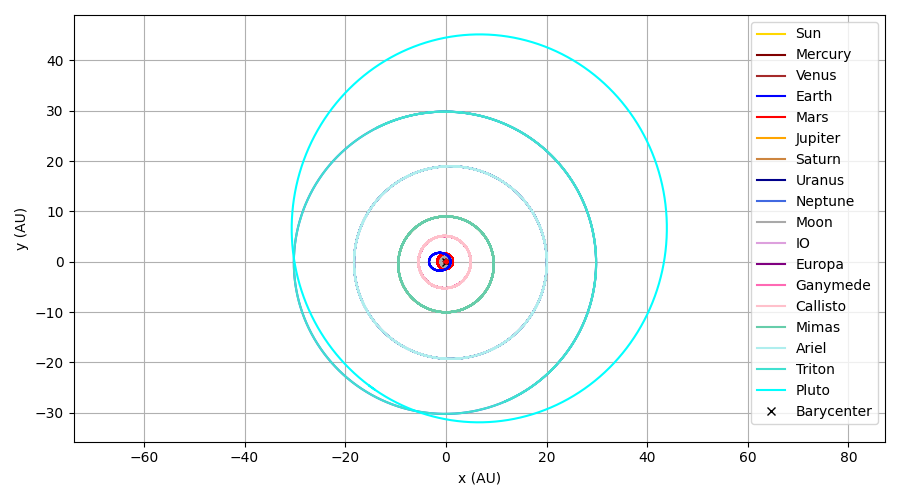

In [26]:
#1c simulating the Solar System and some moons
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt



    

    


    # Define computational units: masses in solar masses, distances in AUs, time in Earth years
G=4.0*np.pi**2

    # System of two masses, one with 1.00 solar mass, the other with 0.1 solar mass (roughly 100x mass of Jupiter)
N=18

   


    # Choose orbital period of 1.0 Earth year
T=1.0
w=2.0*np.pi/T


def accel_grav(mass, position):
    N = mass.shape[0]
    accel_grav = np.zeros([N,3])
    for i in range(N-1):
        for j in range(i+1,N):
            displacement = position[j,:]-position[i,:]
            distance_cubed = (displacement[0]**2+displacement[1]**2+displacement[2]**2)**1.5
            displacement = (displacement/distance_cubed) 
            accel_grav[i,:] += mass[j]*displacement
            accel_grav[j,:] -= mass[i]*displacement
    return accel_grav

def first_step(position,velocity,acceleration,dt):
    return position+dt*velocity+0.5*(dt**2)*acceleration

def verlet_step(position,position_old,acceleration,dt):
    return 2.0*position-position_old+(dt**2)*acceleration




    # Kepler's 3rd Law to compute semi-major axis
#M=np.sum(mass)
#a=(G*M/w**2)**(1.0/3.0)

    # Initial positions: place two masses on x-axis with center-of-mass at origin
    # rows: different masses; columns: x, y, z coordinates
position=np.zeros([N,3])
    #position[0,:]=np.array([-a*mass[1]/M,0,0])
    #position[1,:]=np.array([+a*mass[0]/M,0,0])

au = 1.496e+8

    #


xMercury = (5.199877957334730e+07 / au) 
yMercury = (-2.370953967162964e+07 / au) 
zMercury = (-6.813237660072733e+06 / au) 
    #
xJupiter = (-4.131080193264723E+08 / au) 
yJupiter = (-6.895063647582636E+08 / au) 
zJupiter = (1.210749929284951E+07 / au) 
    #
xSun = (-1.495101075039878E+05 / au) 
ySun = (1.106259315594558E+06 / au) 
zSun = (9.675398814459331E+02 / au)



xVenus = -8.679153883298413E+07 /au
yVenus = 6.446138759949318E+07 /au
zVenus = 5.867672579719771E+06 /au
    
xEarth = -3.886522150006551E+07 /au 
yEarth = 1.430206745912296E+08  / au
zEarth = 1.883196715973318E+03 / au
    
xMars =-1.464697478294306E+08 /au
yMars = 1.986253294547337E+08 /au
zMars = 7.736544248200640E+06 /au
    
xSaturn = 1.385152256381352E+09 /au
ySaturn =-4.181239662065806E+08 /au
zSaturn =-4.778240353674421E+07 /au
    
xUranus = 1.307827229217906E+09 /au 
yUranus =-2.638351931152593E+09 /au
zUranus =-2.674667096438980E+07 /au
    
xNeptune = 1.768870245721755E+09 /au
yNeptune =-4.151457060187383E+09 /au
zNeptune = 4.472505985723901E+07 /au
    
xMoon =-3.849481043543395E+07 /au
yMoon = 1.429186441382921E+08 /au
zMoon = 3.089393370564282E+04 /au
    
xIO =-4.135123962596191E+08 /au
yIO =-6.893812302566739E+08 /au
zIO = 1.210612222206393E+07 /au

xEuropa =-4.134474658862829E+08 /au 
yEuropa =-6.900864560296533E+08 /au
zEuropa = 1.208176224101704E+07 /au
    
xGanymede =-4.120454129491895E+08 /au
yGanymede =-6.893814621589197E+08 /au
zGanymede = 1.212330431229168E+07 /au

xCallisto =-4.114560579357040E+08 /au 
yCallisto =-6.886272615580981E+08 /au
zCallisto = 1.215814327315736E+07 /au

xMimas = 1.385278367609140E+09 /au
yMimas =-4.180022181545605E+08 /au
zMimas =-4.785258275632173E+07 /au
    
xAriel = 1.307721887334984E+09 /au
yAriel =-2.638350967007255E+09 /au
zAriel =-2.690575545245838E+07 /au
    
xTriton = 1.768757237895620E+09 /au
yTriton =-4.151255455001078E+09 /au
zTriton = 4.499398529338384E+07 /au
    
xPluto =-2.273512059546033E+09 /au 
yPluto =-3.689077451814580E+09/au 
zPluto = 1.052383296702657E+09 /au
    

solarmass = 2.0e30 #kg 
massMercury = 3.302e23/solarmass
massJupiter = 1.9e27/solarmass
massVenus = 4.8685e23/solarmass
massEarth = 5.972e24/solarmass
massMars = 6.417e23/solarmass
massSaturn = 5.683e26/solarmass
massUranus = 86.813e24/solarmass 
massNeptune = 102.409e24/solarmass 
    
massMoon =  7.349e22/solarmass
massIO = 8.931e22/solarmass
massEuropa = 4.7981e+22/solarmass
massGanymede = 1.481e+23/solarmass
massCallisto = 1.075e+23/solarmass
massMimas = 3.75e19/solarmass 
massAriel = 13.53e20/solarmass
massTriton = 2.129e+22/solarmass
    
massPluto = 0.0074e-6
    
    
    


mass=np.array([1.00,massMercury,massVenus,massEarth,massMars,massJupiter,massSaturn,massUranus,massNeptune,
                  massMoon,massIO,massEuropa,massGanymede,massCallisto,massMimas,massAriel,massTriton,massPluto])    

    
    
position[0,:] = np.array([xSun,ySun,zSun])
position[1,:] = np.array([xMercury,yMercury,zMercury])
position[2,:] = np.array([xVenus,yVenus,zVenus])
position[3,:] = np.array([xEarth,yEarth,zEarth])
position[4,:] = np.array([xMars,yMars,zMars])
position[5,:] = np.array([xJupiter,yJupiter,zJupiter])
position[6,:] = np.array([xSaturn,ySaturn,zSaturn])
position[7,:] = np.array([xUranus,yUranus,zUranus])
position[8,:] = np.array([xNeptune,yNeptune,zNeptune])
position[9,:] = np.array([xMoon,yMoon,zMoon])
position[10,:] = np.array([xIO,yIO,zIO])
position[11,:] = np.array([xEuropa,yEuropa,zEuropa])
position[12,:] = np.array([xGanymede,yGanymede,zGanymede])
position[13,:] = np.array([xCallisto,yCallisto,zCallisto])
position[14,:] = np.array([xMimas,yMimas,zMimas])
position[15,:] = np.array([xAriel,yAriel,zAriel])
position[16,:] = np.array([xTriton,yTriton,zTriton])
position[17,:] = np.array([xPluto,yPluto,zPluto])


    
velocity=np.zeros([N,3])
sec2year = 3.171e-8
    
conversion = (1/au) * (1/sec2year)


    #
vxMercury = 1.140282161172121E+01 * (1/au) * (1/sec2year)
vyMercury = 4.620741568620204E+01 * (1/au) * (1/sec2year)
vzMercury = 2.726559746465060E+00 * (1/au) * (1/sec2year)
    #
vxJupiter = 1.103985519413431E+01 * (1/au) * (1/sec2year)
vyJupiter = -6.102713598885527E+00 * (1/au) * (1/sec2year)
vzJupiter = -2.219424259481948E-01 * (1/au) * (1/sec2year)
#
vxSun = -1.156533047710708E-02 * (1/au) * (1/sec2year)
vySun = 3.049105386033658E-03 * (1/au) * (1/sec2year)
vzSun = 2.923271646459486E-04 * (1/au) * (1/sec2year)
#

vxVenus = -2.081917085020979E+01 * conversion 
vyVenus = -2.844192113310572E+01 * conversion
vzVenus = 8.130480857668925E-01  * conversion

vxEarth=-2.924028050911458E+01 * conversion
vyEarth=-7.959197718589878E+00 * conversion
vzEarth= 6.837737427742852E-04 * conversion

vxMars=-1.856396989207666E+01 * conversion
vyMars=-1.235778674899972E+01 * conversion
vzMars= 1.975932475227813E-01 * conversion

vxSaturn= 2.270435597611833E+00 * conversion
vySaturn= 9.226678844970907E+00 * conversion
vzSaturn=-2.508165939073437E-01 * conversion
    
vxUranus= 6.051209314456494E+00 * conversion
vyUranus= 2.708351700771504E+00 * conversion
vzUranus=-6.824487751293162E-02 * conversion

vxNeptune= 4.965628061344948E+00 * conversion
vyNeptune= 2.161529296698530E+00 * conversion
vzNeptune=-1.588701155437243E-01 * conversion


vxMoon=-2.890083134253171E+01 *conversion 
vyMoon=-6.999935120097978E+00 *conversion
vzMoon=-4.167687432958589E-02 *conversion

vxIO= 5.972168450344581E+00 *conversion
vyIO=-2.260372637132108E+01 *conversion
vzIO=-8.762269557565716E-01 *conversion



vxEuropa= 2.281003316903272E+01 * conversion
vyEuropa=-1.313517770020946E+01 * conversion
vzEuropa=-1.968152429661956E-01 * conversion

vxGanymede= 9.782534489223943E+00 *conversion
vyGanymede = 4.701076381759819E+00 *conversion
vzGanymede= 1.559562655740234E-01 *conversion

vxCallisto = 7.193609859522682E+00 *conversion 
vyCallisto = 1.194516350700790E+00 *conversion
vzCallisto =-3.229647274175723E-02 *conversion

vxMimas=-8.070071348245087E+00 *conversion
vyMimas= 1.806492586932997E+01 *conversion
vzMimas=-3.829851248450592E+00 *conversion

vxAriel= 1.611227518852433E+00 *conversion
vyAriel= 4.093477067793894E+00 *conversion
vzAriel= 2.890939544274583E+00 *conversion

vxTriton= 8.671051943450479E+00 *conversion
vyTriton= 4.503806416215314E+00 *conversion
vzTriton=-3.610260294849699E-01 *conversion

vxPluto= 4.817335261924129E+00 *conversion
vyPluto =-3.588741022457168E+00 *conversion
vzPluto=-1.009411626037672E+00 *conversion

velocity[0,:] = np.array([vxSun,vySun,vzSun])
velocity[1,:] = np.array([vxMercury,vyMercury,vzMercury])
velocity[2,:] = np.array([vxVenus,vyVenus,vzVenus])
velocity[3,:] = np.array([vxEarth,vyEarth,vzEarth])
velocity[4,:] = np.array([vxMars,vyMars,vzMars])
velocity[5,:] = np.array([vxJupiter,vyJupiter,vzJupiter])
velocity[6,:] = np.array([vxSaturn,vySaturn,vzSaturn])
velocity[7,:] = np.array([vxUranus,vyUranus,vzUranus])
velocity[8,:] = np.array([vxNeptune,vyNeptune,vzNeptune])
velocity[9,:] = np.array([vxMoon,vyMoon,vzMoon])
velocity[10,:] = np.array([vxIO,vyIO,vzIO])
velocity[11,:] = np.array([vxEuropa,vyEuropa,vzEuropa])
velocity[12,:] = np.array([vxGanymede,vyGanymede,vzGanymede])
velocity[13,:] = np.array([vxCallisto,vyCallisto,vzCallisto])
velocity[14,:] = np.array([vxMimas,vyMimas,vzMimas])
velocity[15,:] = np.array([vxAriel,vyAriel,vzAriel])
velocity[16,:] = np.array([vxTriton,vyTriton,vzTriton])
velocity[17,:] = np.array([vxPluto,vyPluto,vzPluto])



vxcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,0]) 
vycom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,1])
vzcom = (1/np.sum(mass) ) * np.sum(mass*velocity[:,2])

vcom = np.array([vxcom,vycom,vzcom])

# for i in range(len(mass)):
#velocity[0,:] = velocity[0,:] - vcom  
#velocity[1,:] = velocity[1,:] - vcom
#velocity[2,:] = velocity[2,:] - vcom
#velocity[3,:] = velocity[3,:] - vcom
#    velocity[i,:] = velocity[i,:] - vcom


# Step size and number of time steps
#T = 1.0 #earth year

dt=T/720.0/4
tot_time=248
num_steps=np.ceil(tot_time/dt).astype(int)
positions=np.zeros([N,3,num_steps+1])
positions[:,:,0]=position
# First time step
acceleration=G*accel_grav(mass,position)
position_new=first_step(position,velocity,acceleration,dt)
position_old=position
position=position_new
positions[:,:,1]=position

# Loop through time steps 2 through num_steps
for t in range(2,num_steps+1):
    acceleration=G*accel_grav(mass,position)
    position_new=verlet_step(position,position_old,acceleration,dt)
    position_old=position
    position=position_new
    positions[:,:,t]=position


        
    
fig = plt.figure(figsize=(9,5))
plt.plot(positions[0,0,:],positions[0,1,:],label='Sun',color='gold')
plt.plot(positions[1,0,:],positions[1,1,:],label='Mercury',color='maroon')
plt.plot(positions[2,0,:],positions[2,1,:],label='Venus',color='brown')
plt.plot(positions[3,0,:],positions[3,1,:],label='Earth',color='blue')
plt.plot(positions[4,0,:],positions[4,1,:],label='Mars',color='red')
plt.plot(positions[5,0,:],positions[5,1,:],label='Jupiter',color='orange')
plt.plot(positions[6,0,:],positions[6,1,:],label='Saturn',color='peru')
plt.plot(positions[7,0,:],positions[7,1,:],label='Uranus',color='darkblue')
plt.plot(positions[8,0,:],positions[8,1,:],label='Neptune',color='royalblue')
plt.plot(positions[9,0,:],positions[9,1,:],label='Moon',color='darkgray')
plt.plot(positions[10,0,:],positions[10,1,:],label='IO',color='plum')
plt.plot(positions[11,0,:],positions[11,1,:],label='Europa',color='purple')
plt.plot(positions[12,0,:],positions[12,1,:],label='Ganymede',color='hotpink')
plt.plot(positions[13,0,:],positions[13,1,:],label='Callisto',color='pink')
plt.plot(positions[14,0,:],positions[14,1,:],label='Mimas',color='mediumaquamarine')
plt.plot(positions[15,0,:],positions[15,1,:],label='Ariel',color='paleturquoise')
plt.plot(positions[16,0,:],positions[16,1,:],label='Triton',color='turquoise')
plt.plot(positions[17,0,:],positions[17,1,:],label='Pluto',color='cyan')
    
    
plt.plot(0,0,'x',color='black',label='Barycenter')
    

    
plt.axis('equal');
plt.xlabel('x (AU)');
plt.ylabel('y (AU)');
plt.grid()
plt.legend()
plt.tight_layout()
    


In [27]:
fig.savefig('JovianMoonsOrbits.pdf',bbox_inches='tight')